In [2]:
import pandas as pd
import numpy as np

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from algo_eff_power import get_eff_power
from algo_eff_speed import get_eff_speed

In [4]:
def plot_turbines(points,ax = None):
    X = points[:,0]
    Y = points[:,1]
    if not ax:
        plt.figure(figsize = (10,8))
        plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
        plt.scatter(X,Y,s = 100,marker = '*')    
    else: 
        ax.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
        ax.scatter(X,Y,s = 100,marker = '*')
        
    
def plot_turbines2(list_points,list_aep = None,n = None):
    l = len(list_points)
    fig,ax = plt.subplots(1,l,figsize = (20,8))
    for i,points in enumerate(list_points):
        plot_turbines(points,ax[i])
        if list_aep:
            ax[i].set_title('AEP is '+str(list_aep[i]))
    
    
def plot_turbines3(points,n,title = None):
    plt.figure(figsize = (12,8))
    X = points[:,0]
    Y = points[:,1]
    
    plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
    plt.scatter(X,Y,s = 100,marker = '*')
        
    for i, txt in enumerate(n):
        plt.annotate(txt, (X[i], Y[i]))
    
    if not title == None:
        plt.title('AEP is ' + str(title))
    
def plot_turbines4(file,n,title):
    data = pd.read_csv(file)
    array = np.array(data)
    plot_turbines3(array,n,title)
#         print(points)

In [5]:
WIND_DATA = 'wind_data/full_wind_data.csv'
POWER_CURVE = 'power_curve.csv'

turbine_datasets = glob('turbine_data/*.csv')

In [6]:
temp = turbine_datasets[0]

In [7]:
AEP,farm_pwr,total_eff_pwr = get_eff_power(temp,POWER_CURVE,WIND_DATA)

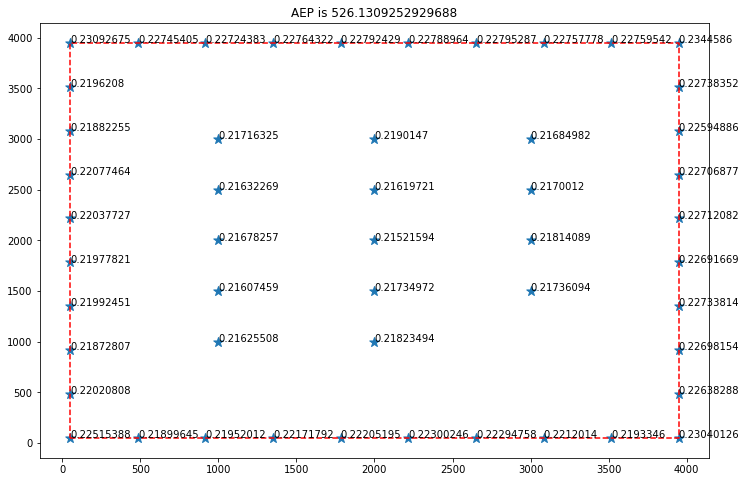

In [8]:
plot_turbines4(temp,total_eff_pwr,title = AEP)

# Effective Power

<ipython-input-4-031412fdfea5>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (12,8))


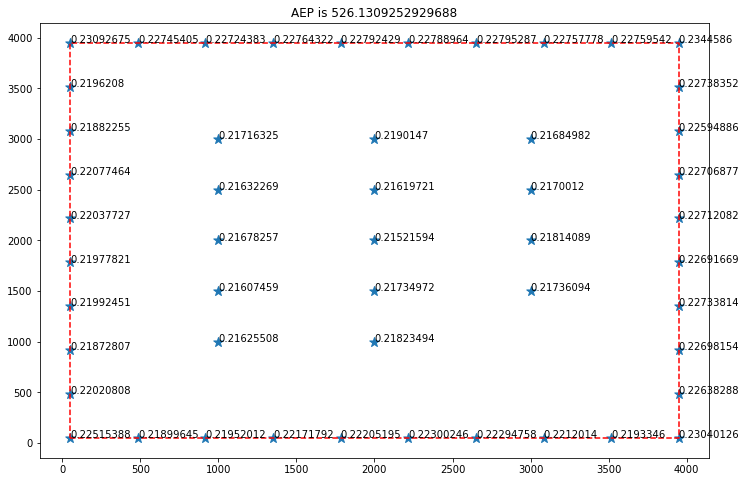

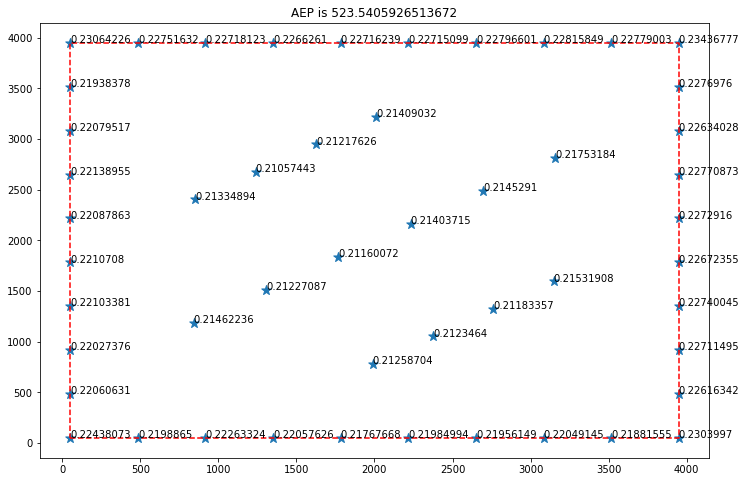

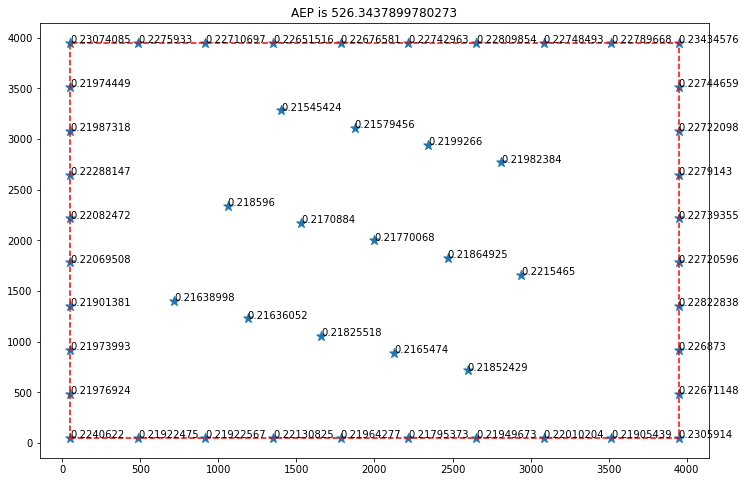

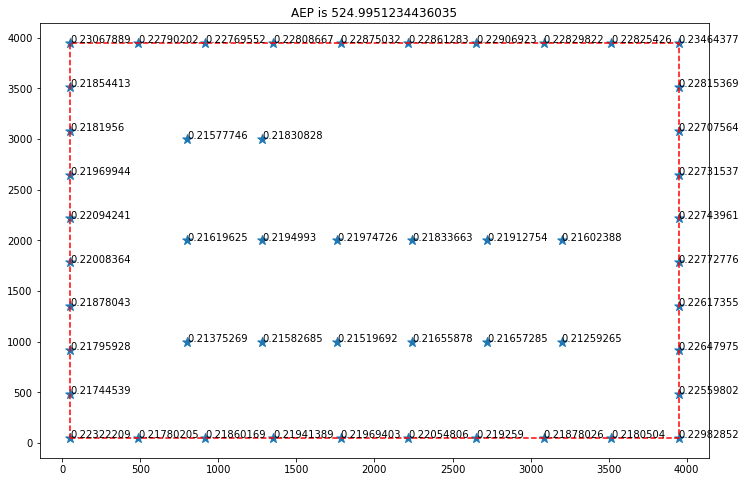

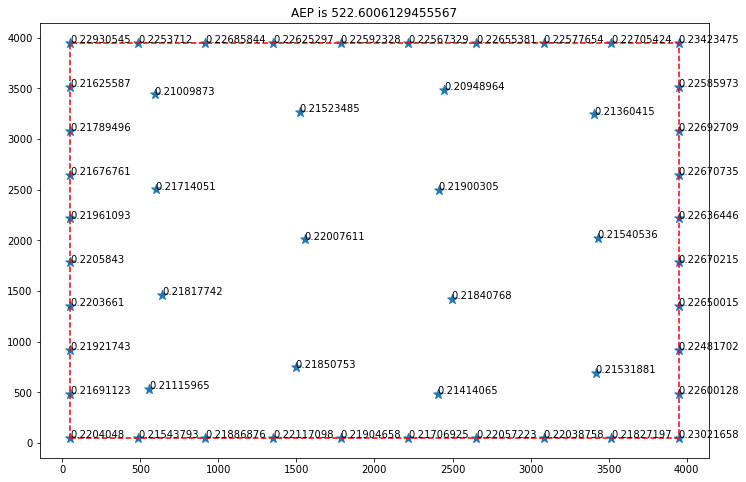

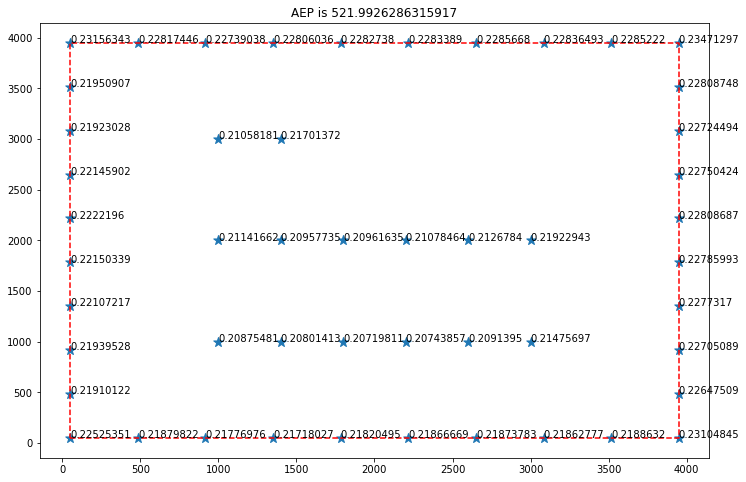

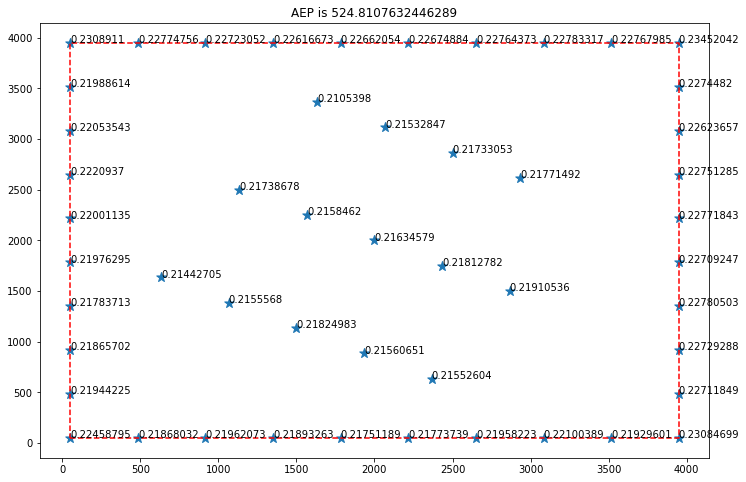

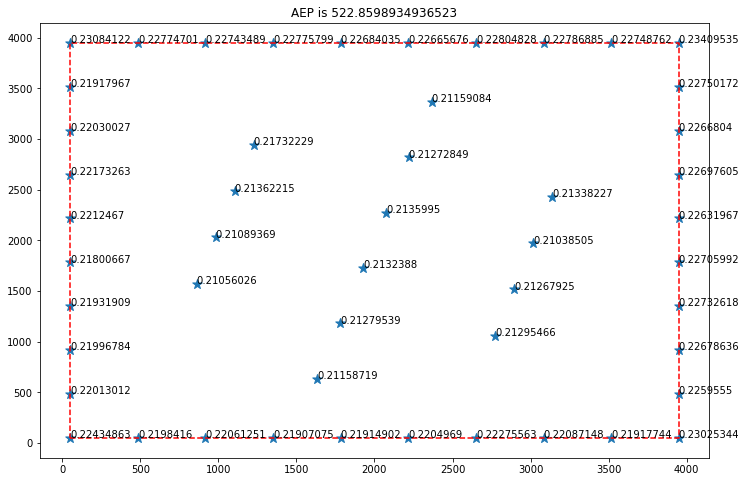

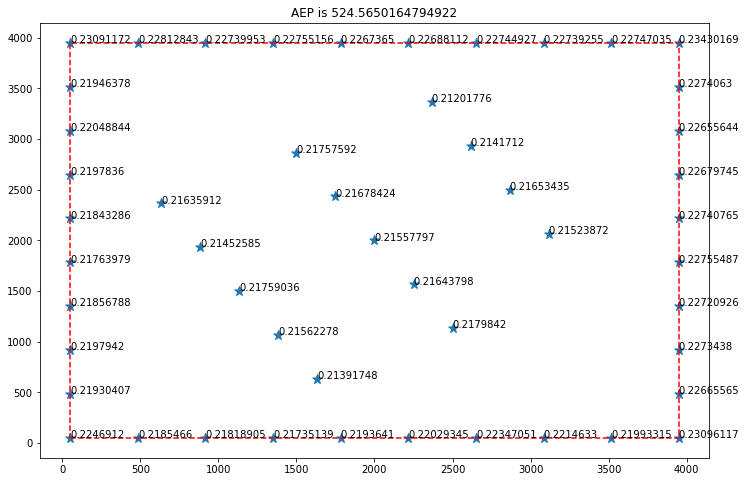

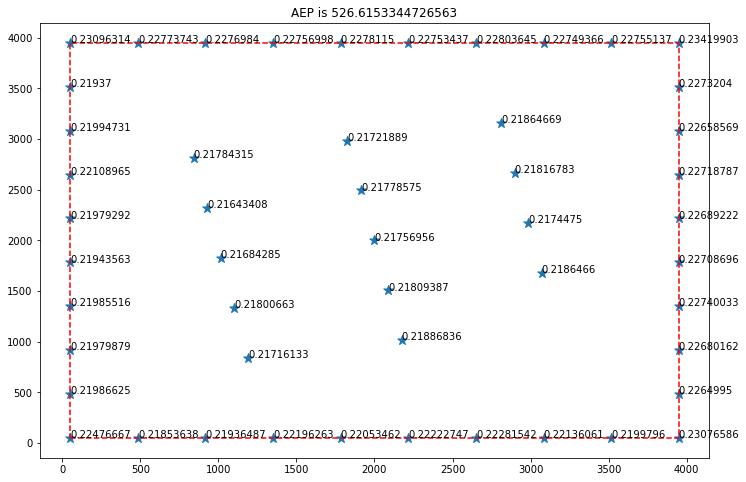

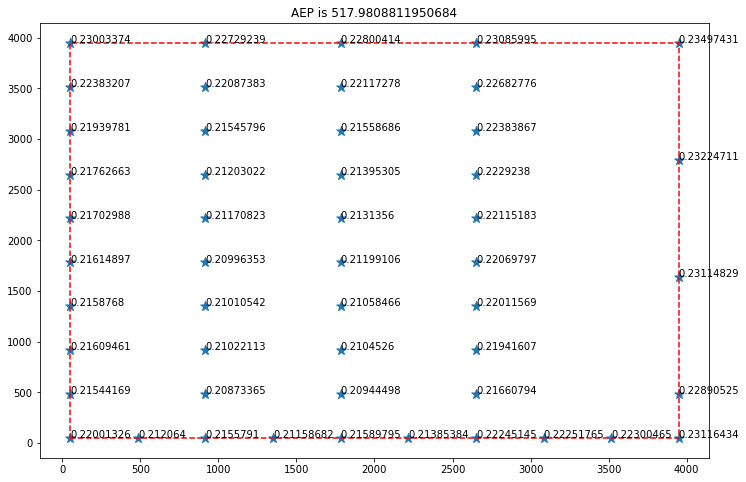

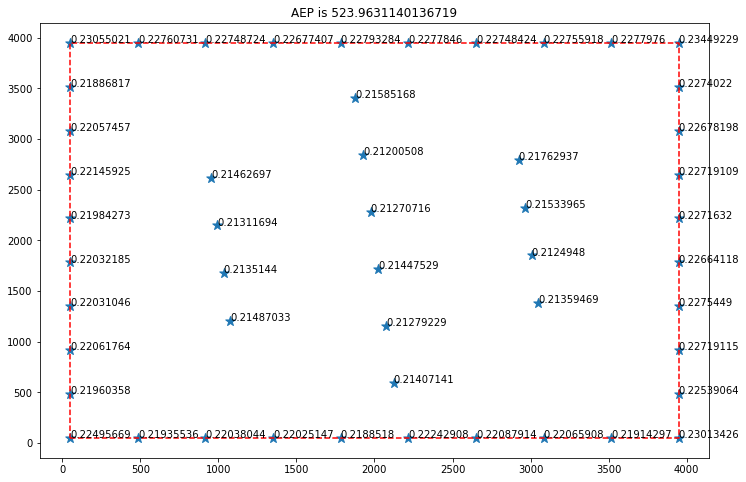

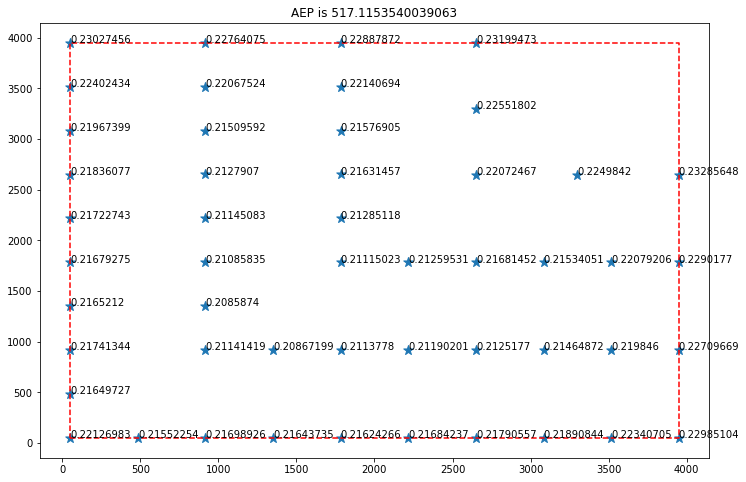

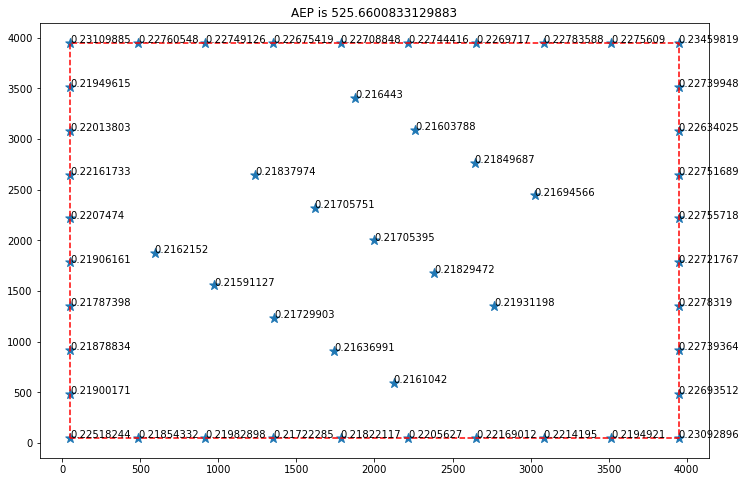

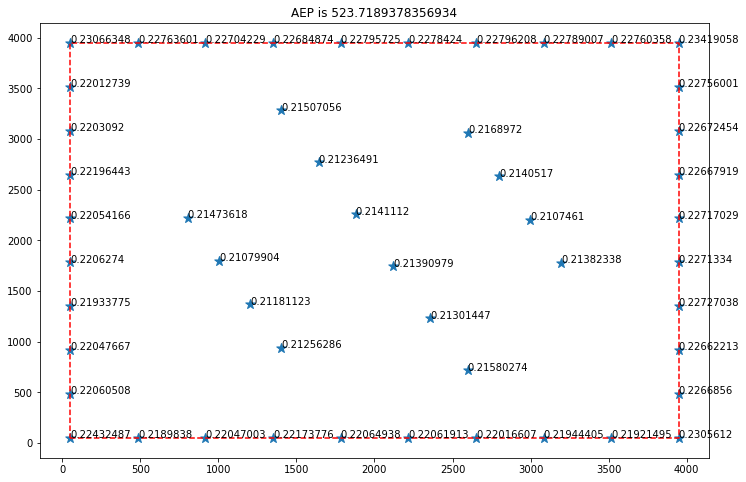

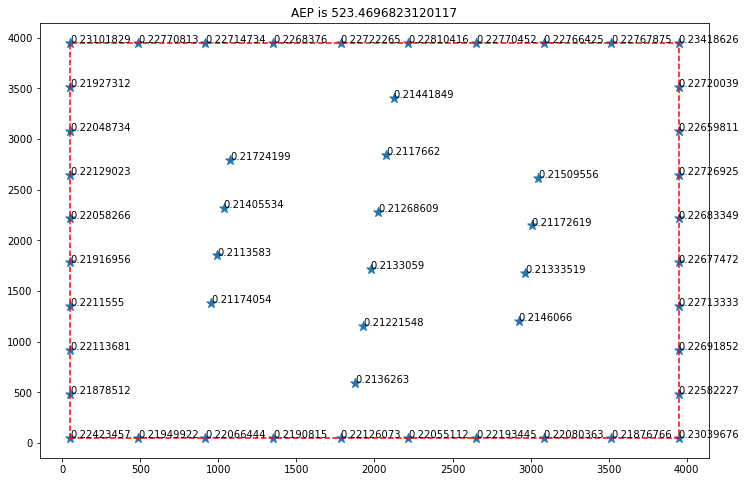

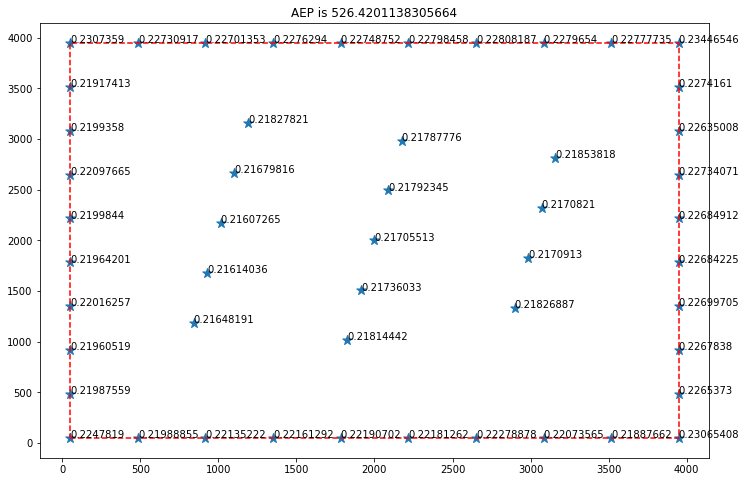

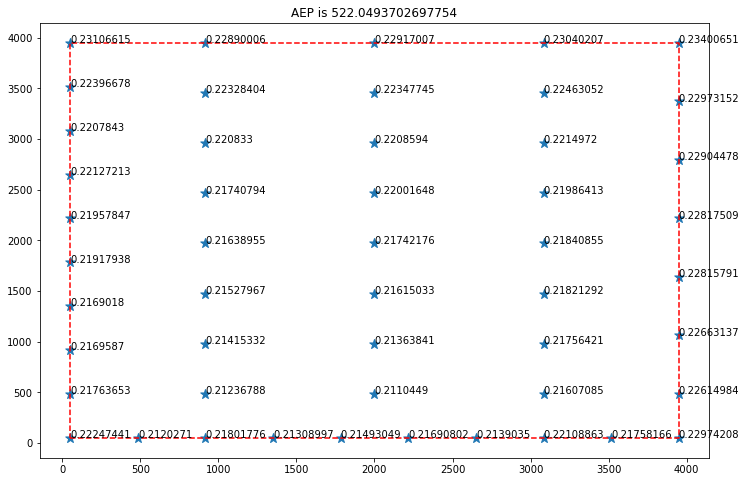

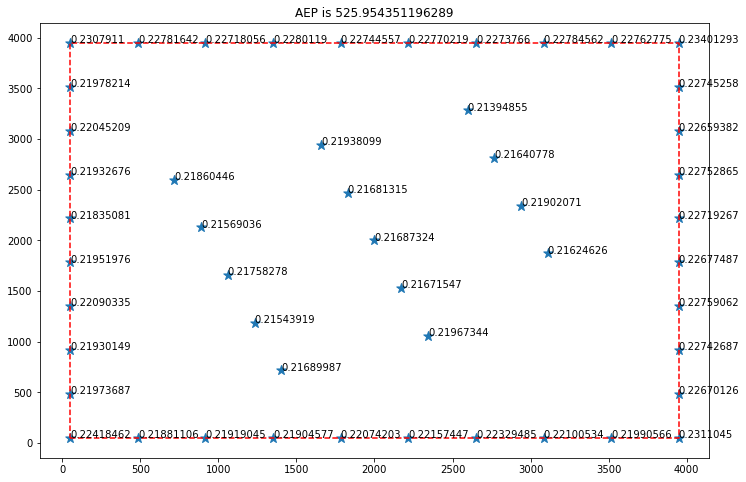

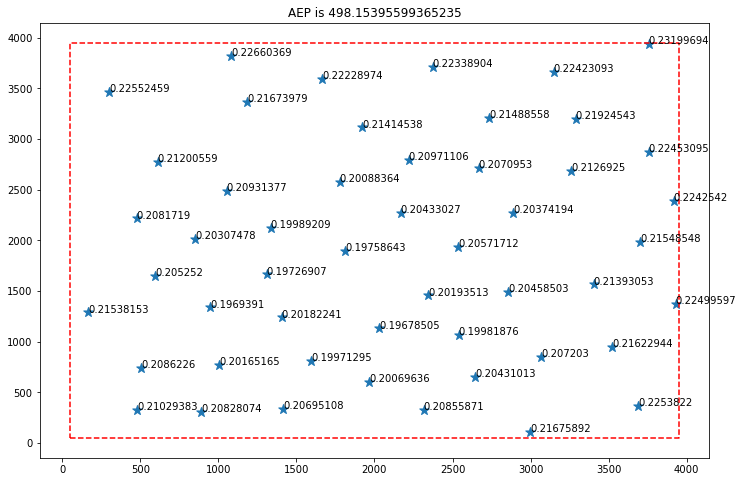

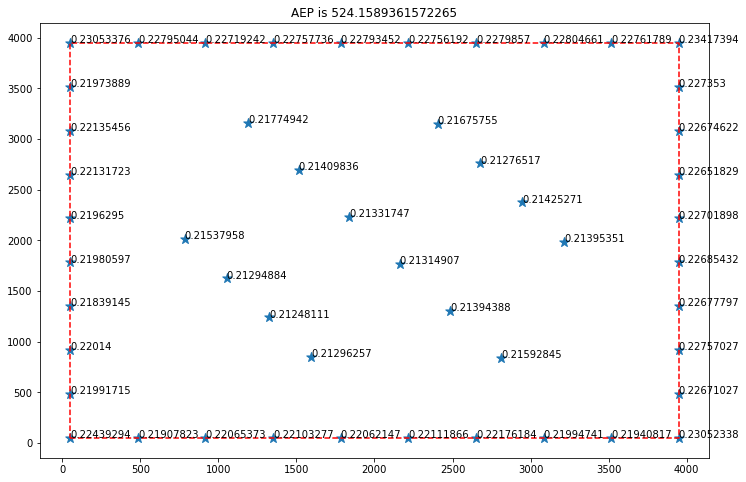

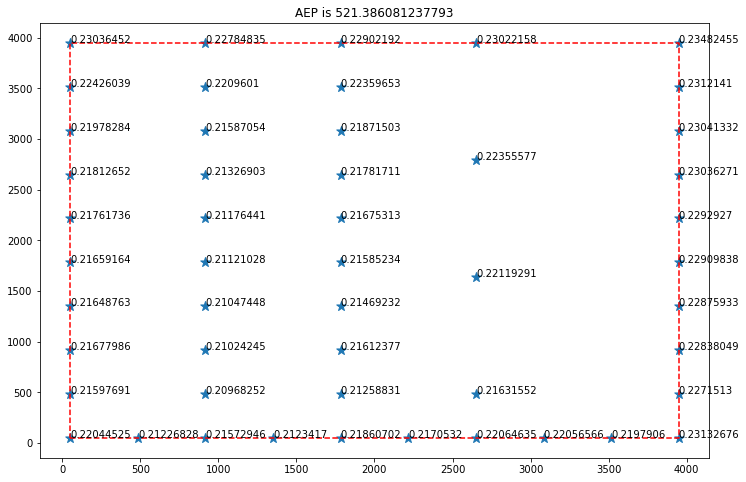

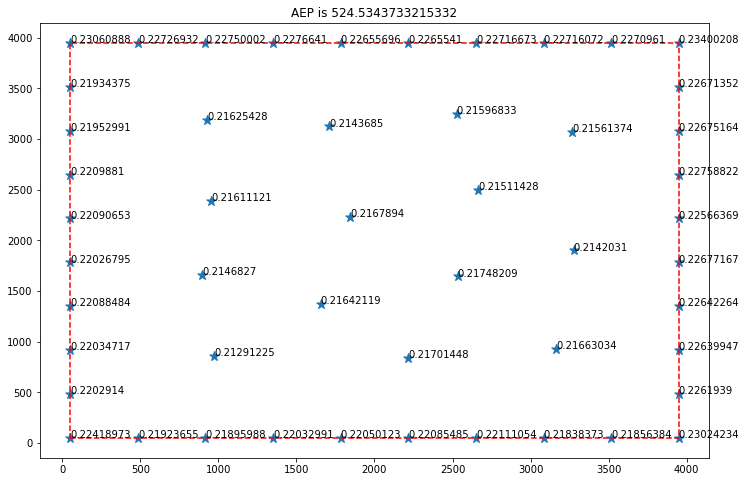

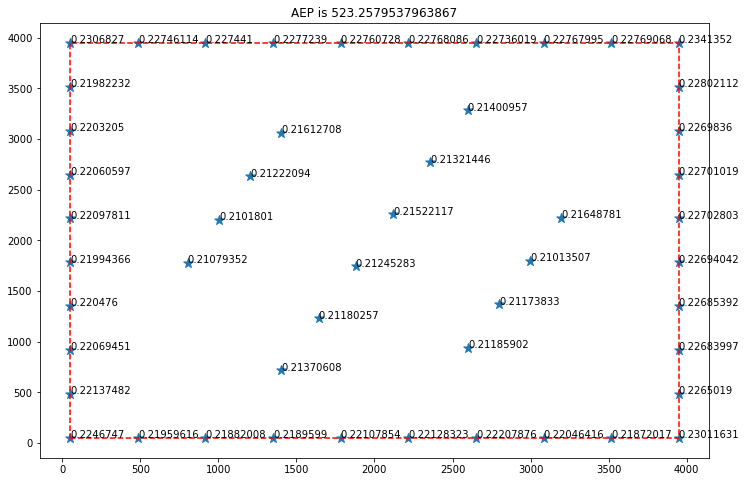

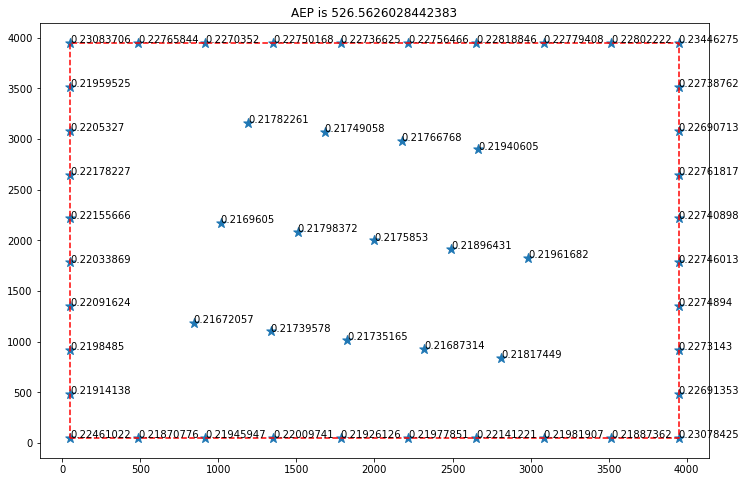

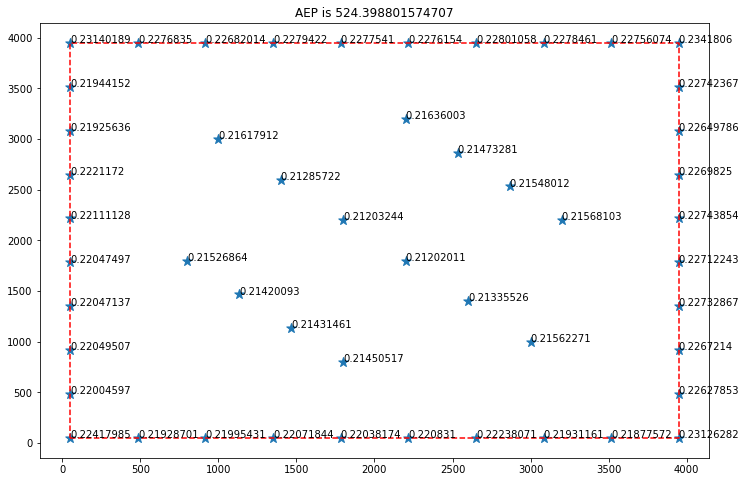

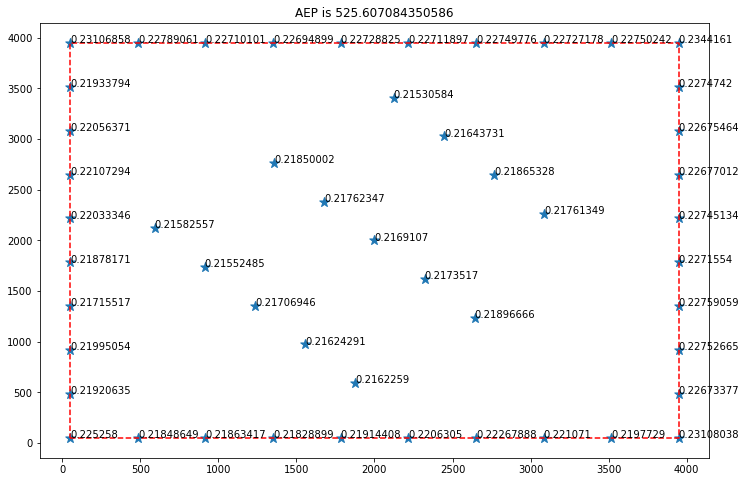

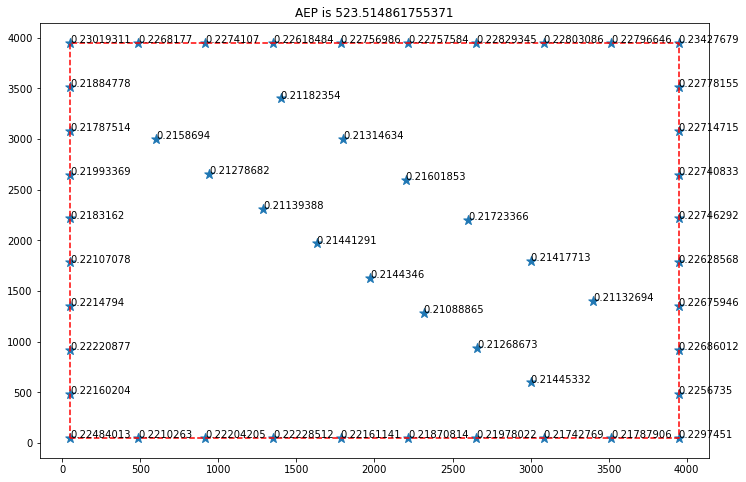

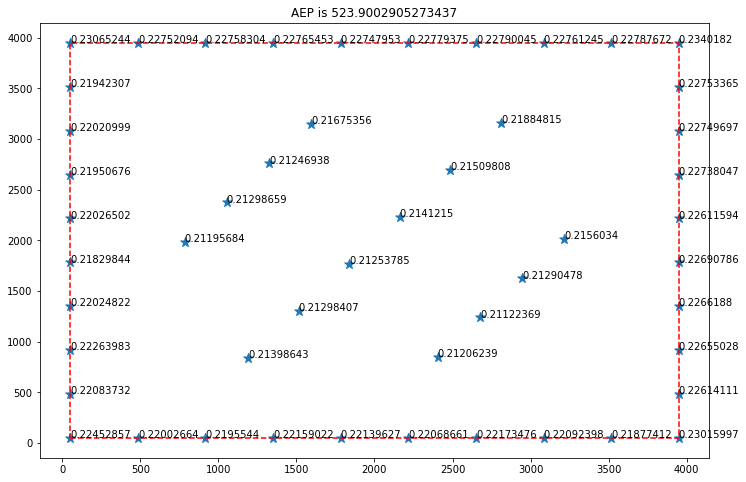

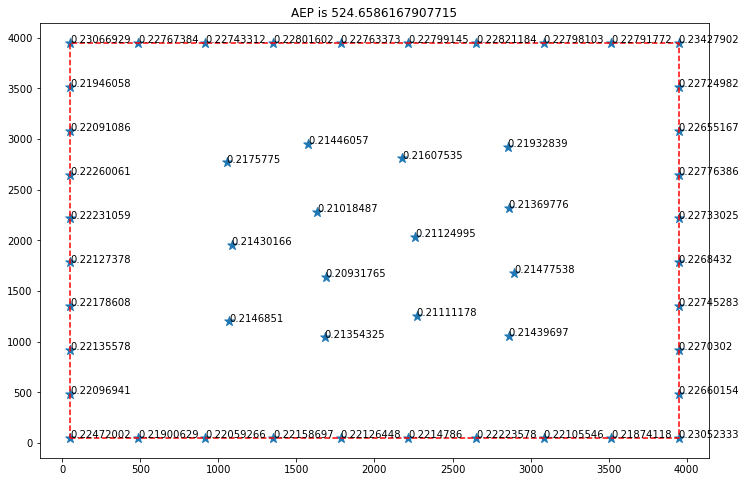

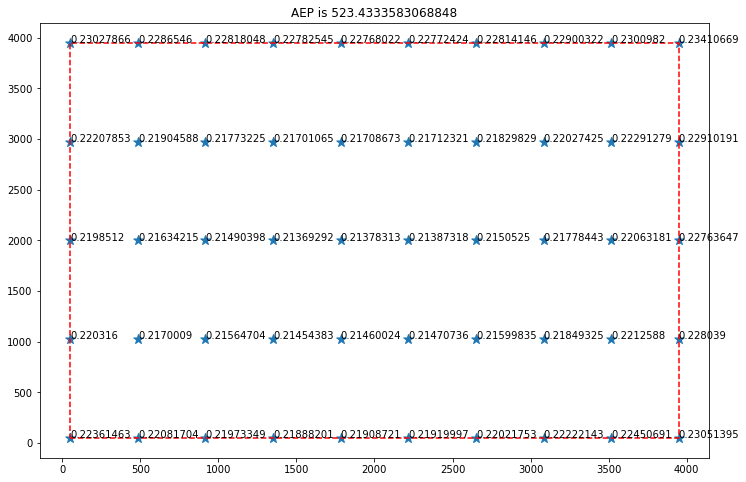

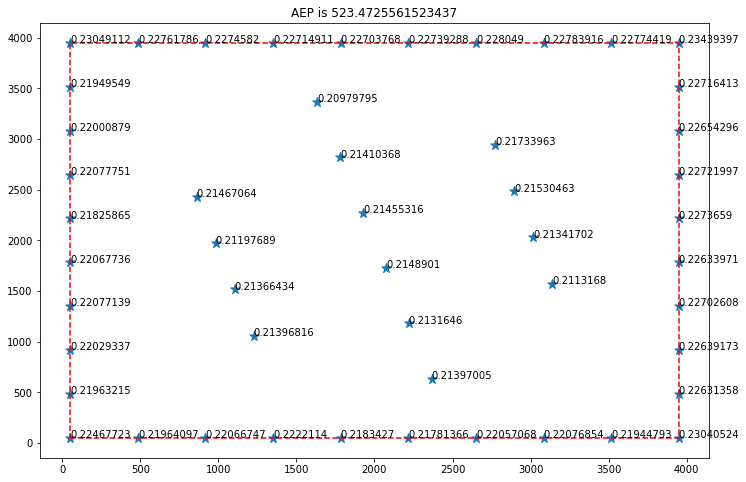

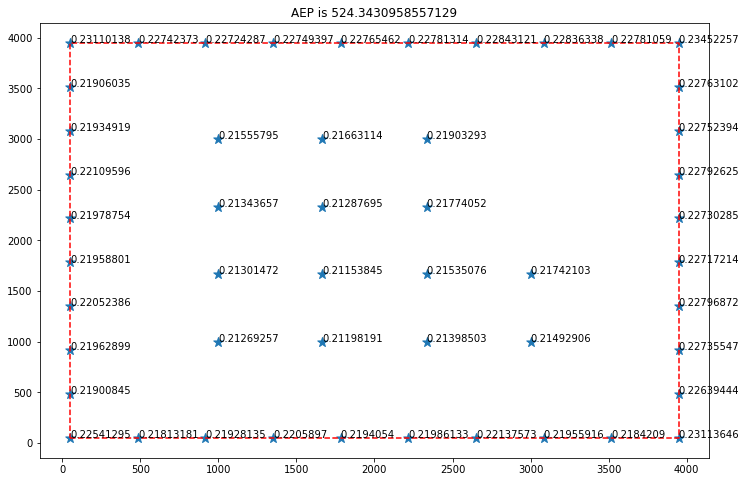

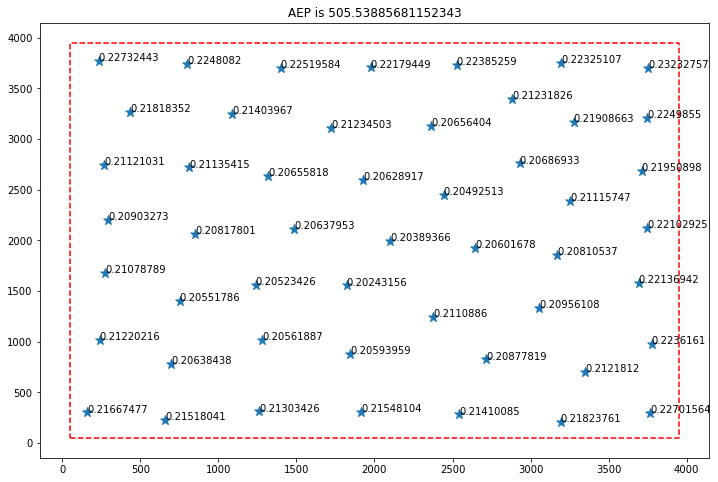

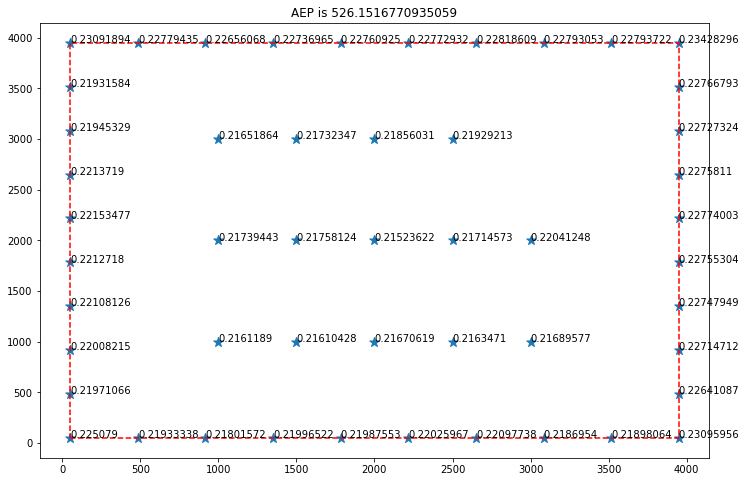

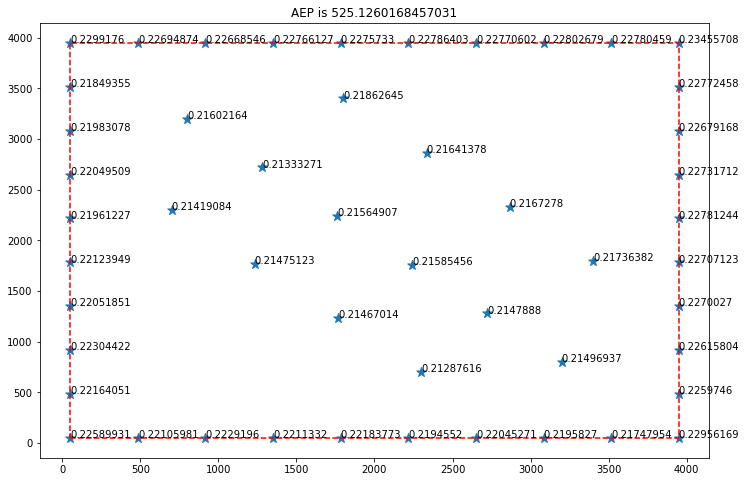

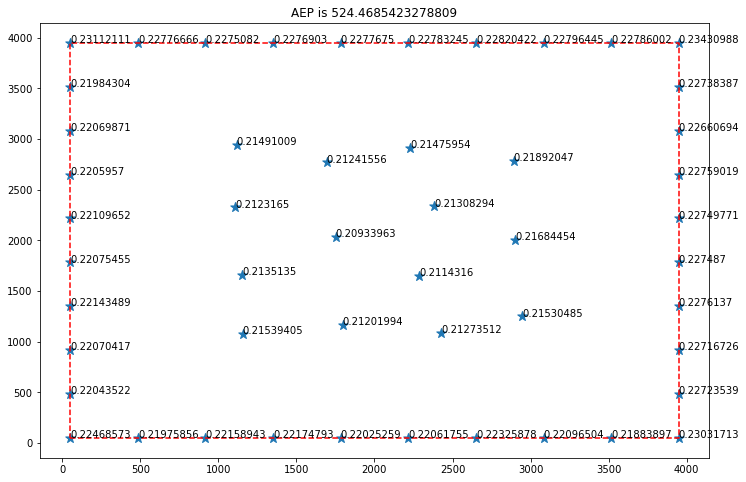

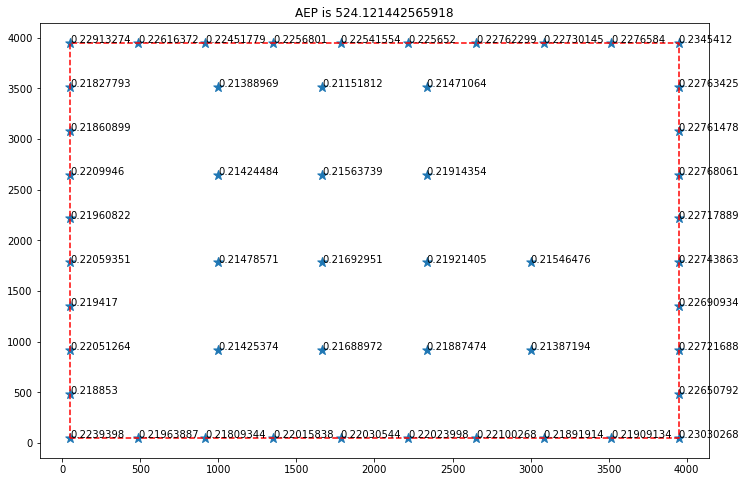

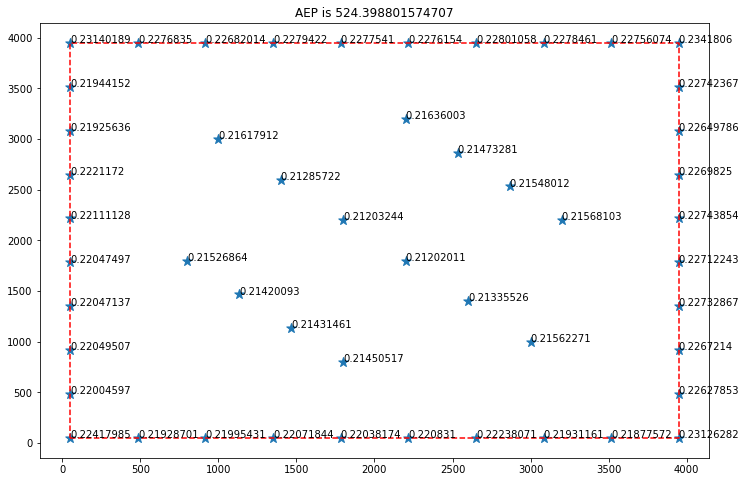

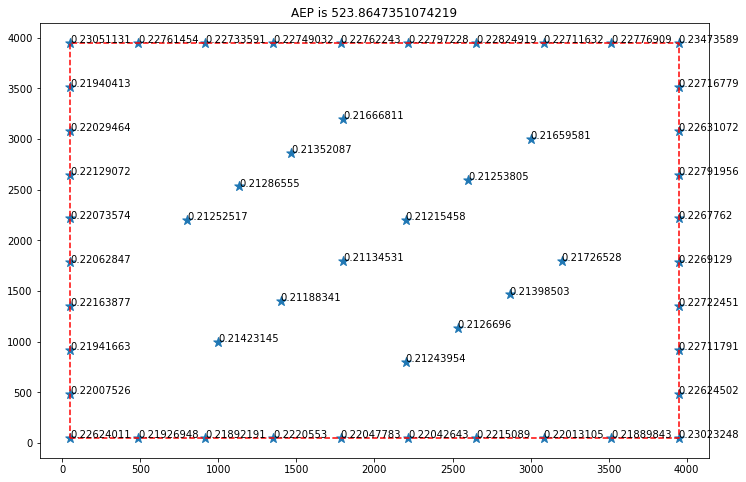

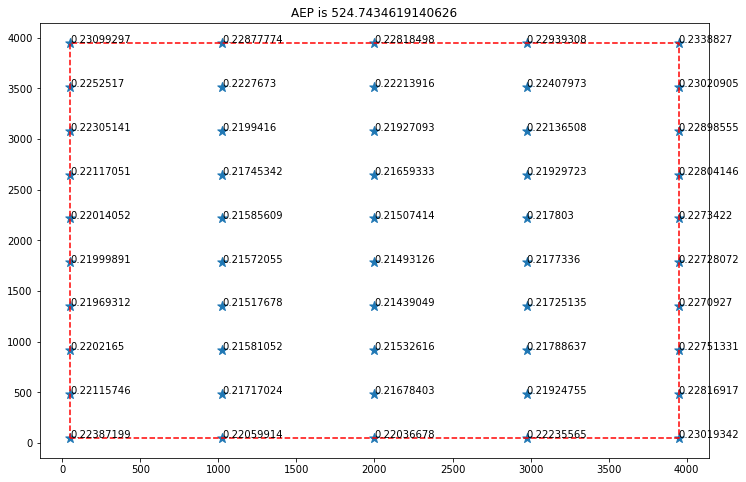

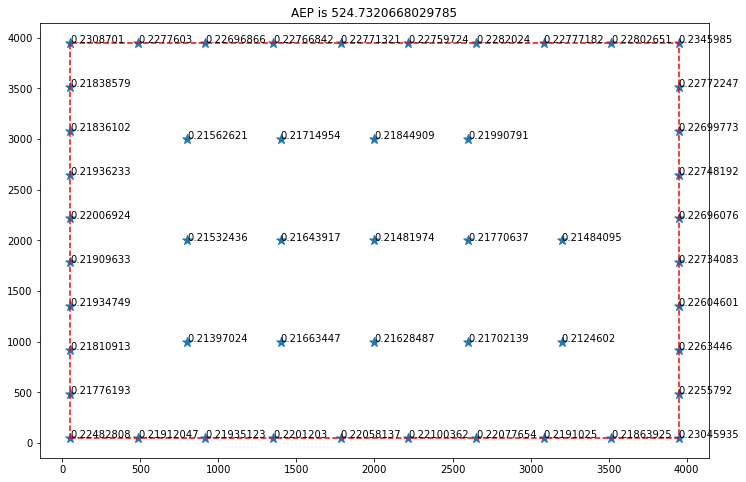

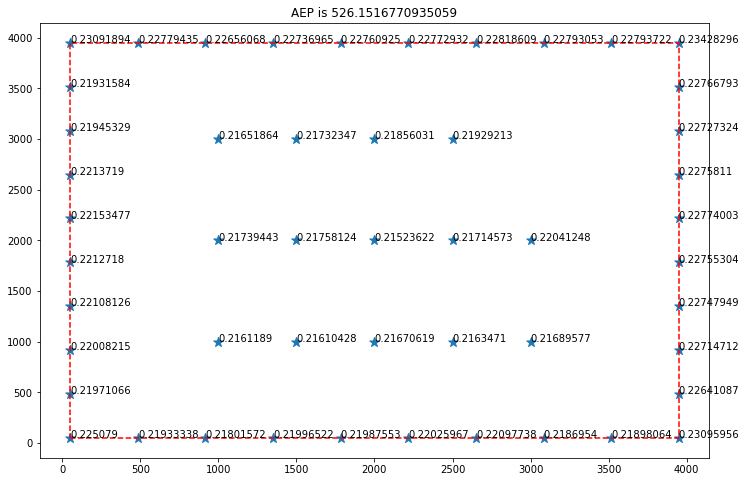

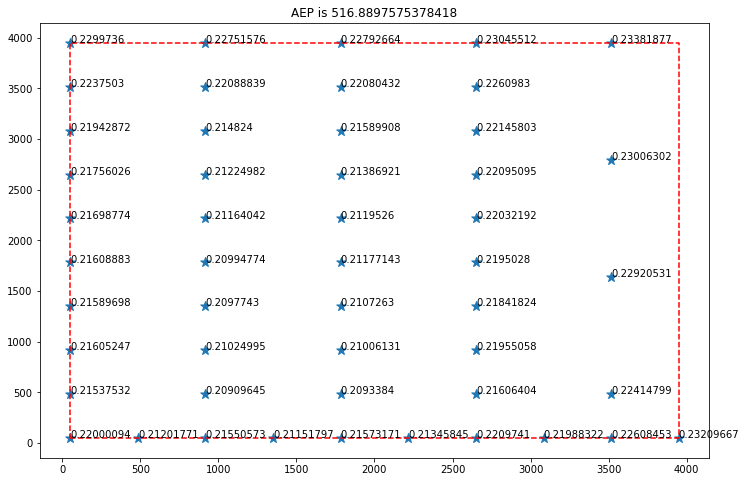

In [9]:
for file in turbine_datasets:
    AEP,farm_pwr,total_eff_pwr = get_eff_power(file,POWER_CURVE,WIND_DATA)
    plot_turbines4(file,total_eff_pwr,title = AEP)

# Effective speed

<ipython-input-4-031412fdfea5>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (12,8))


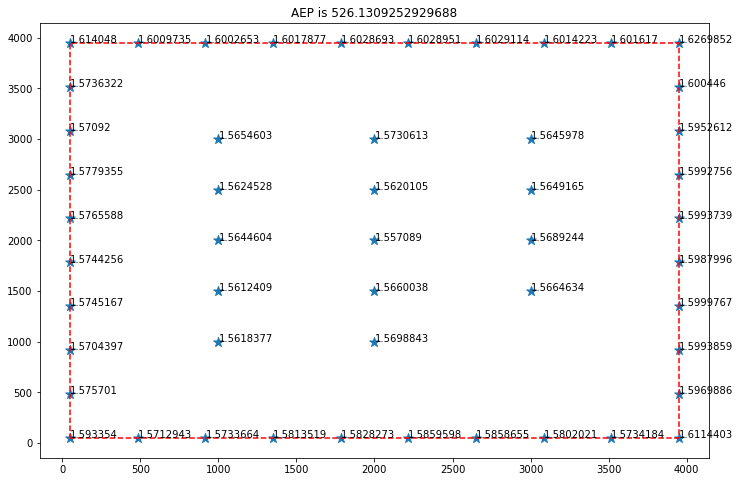

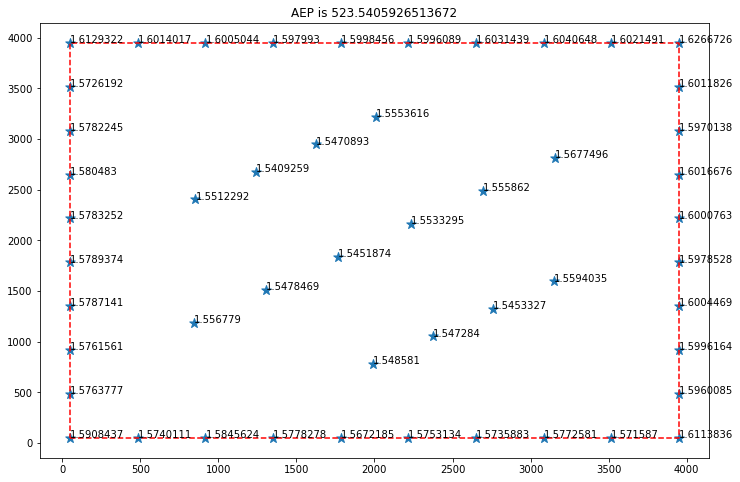

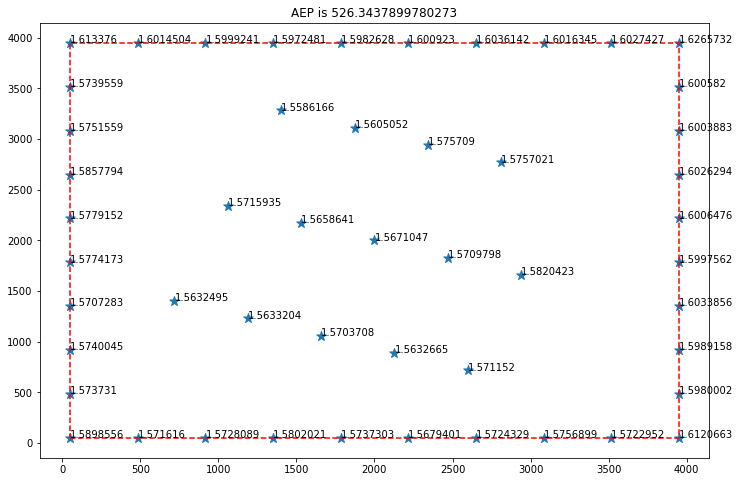

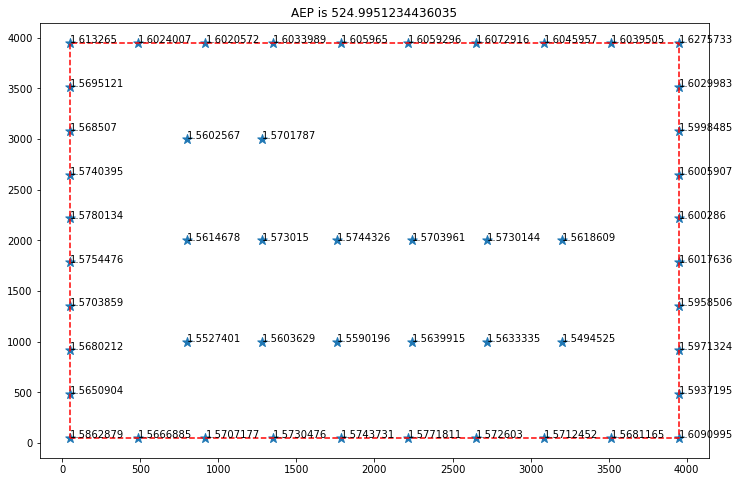

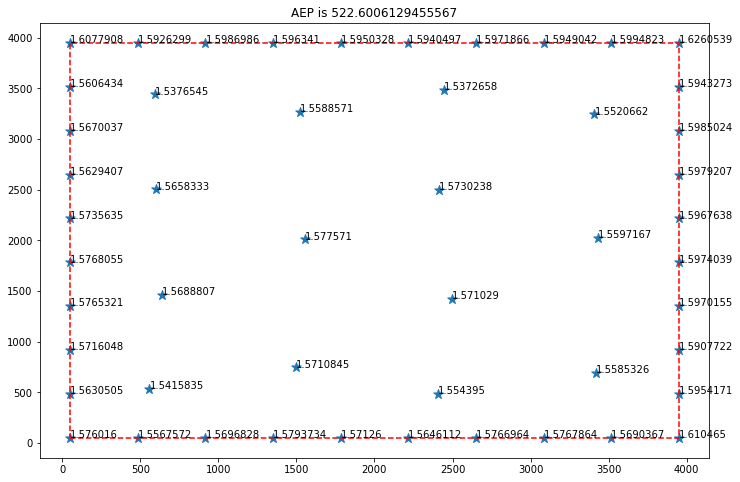

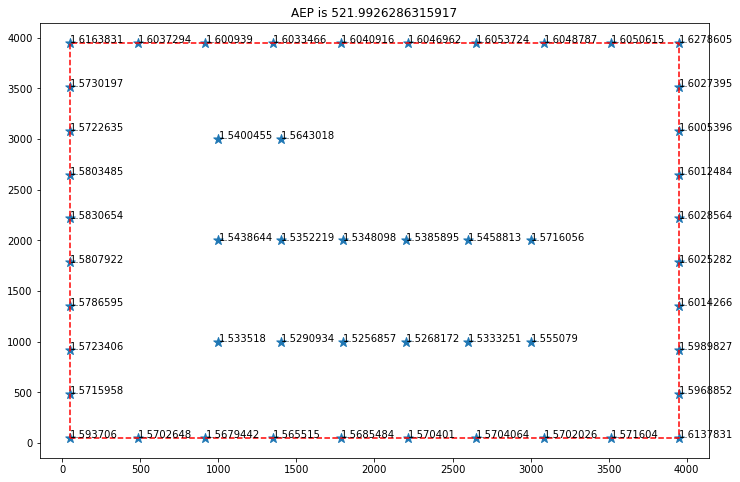

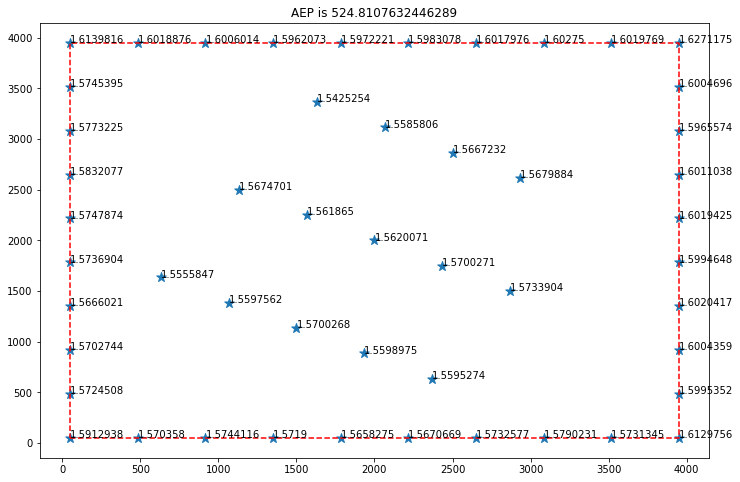

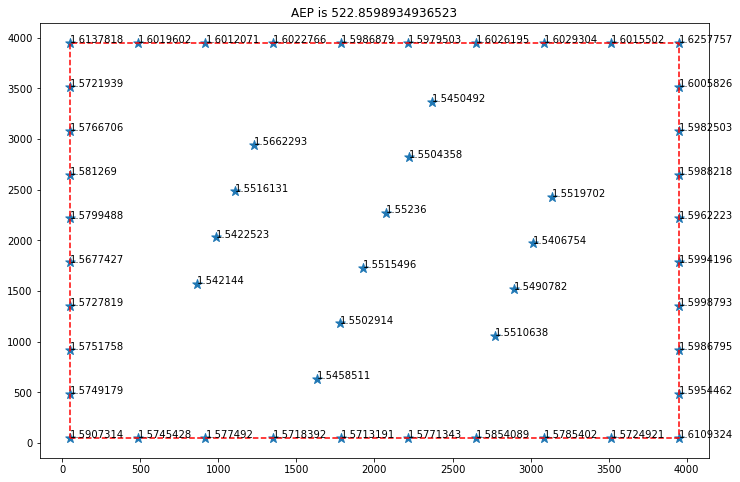

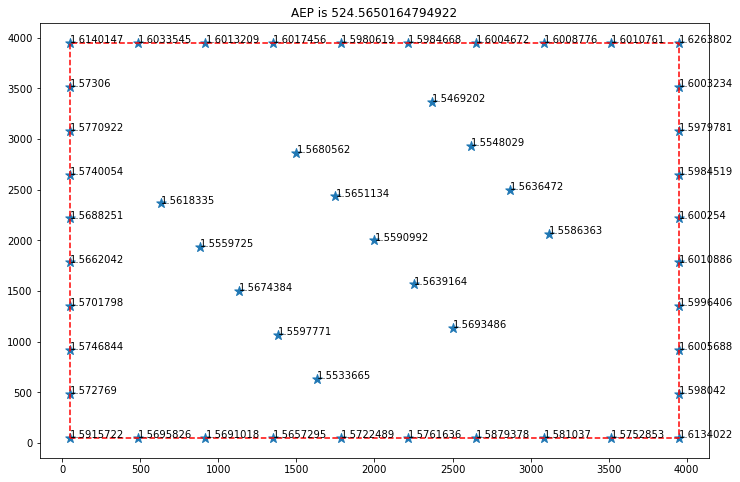

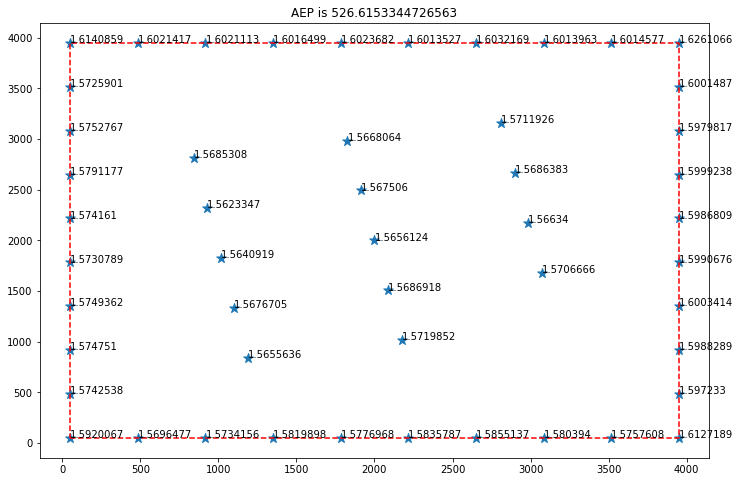

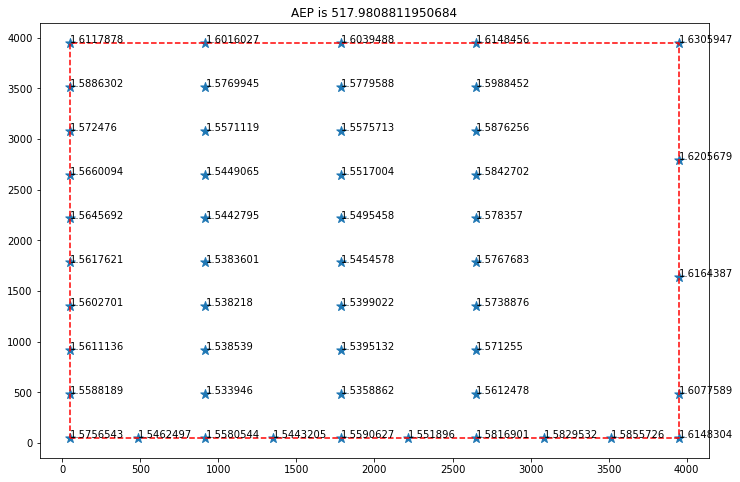

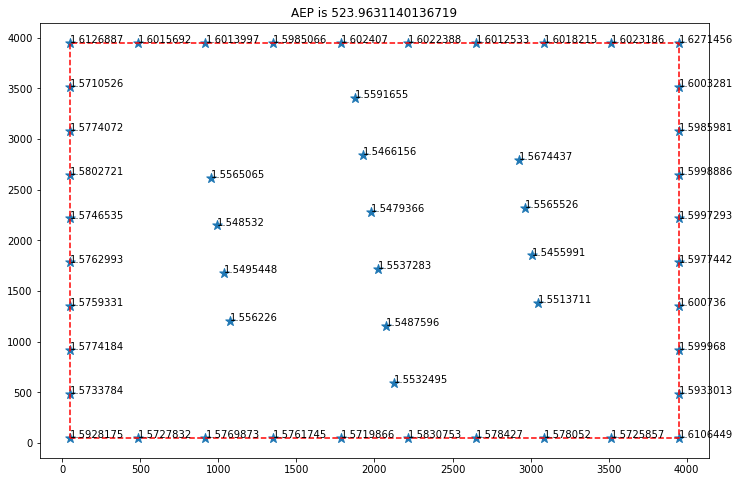

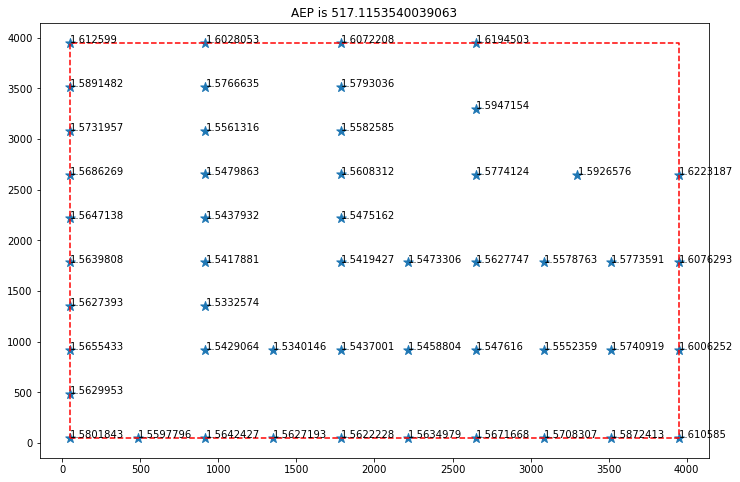

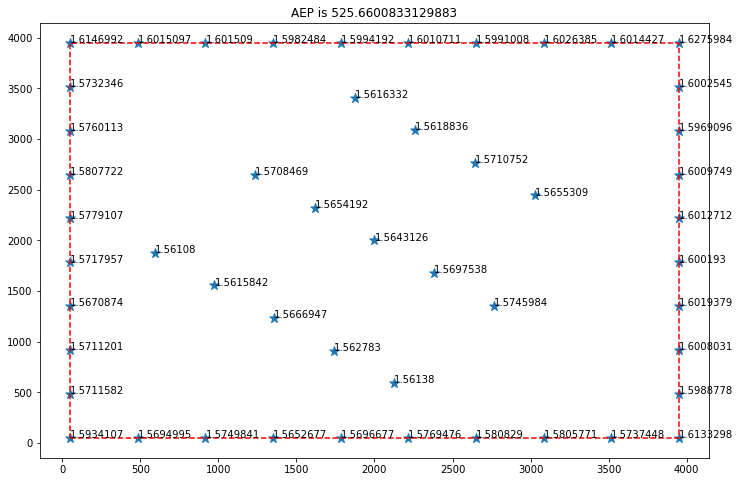

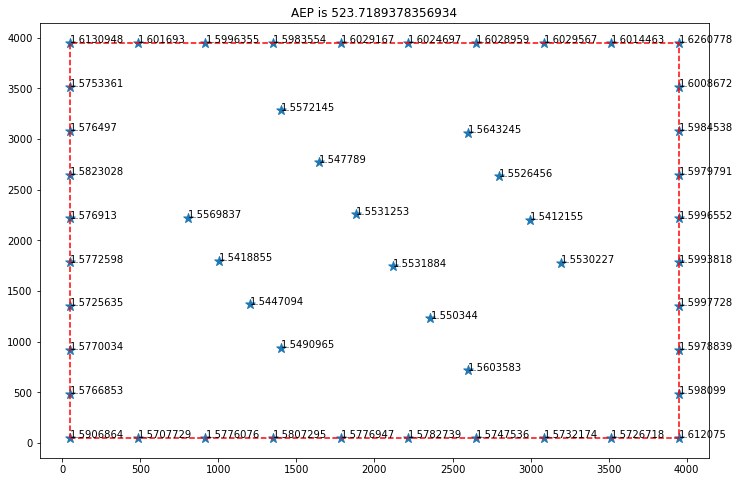

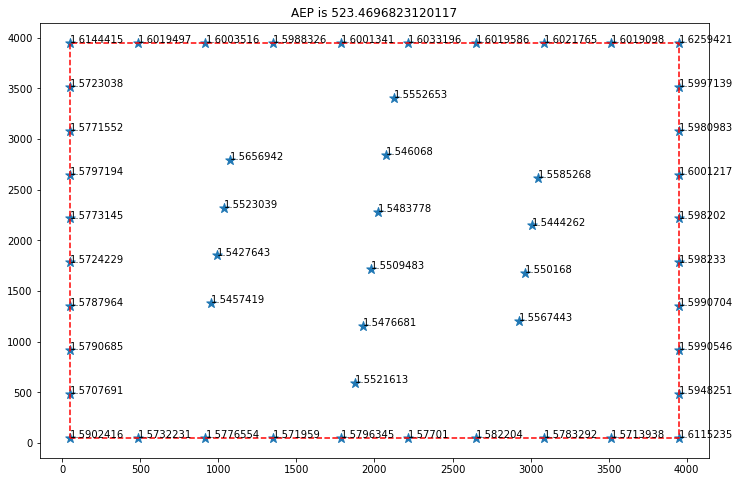

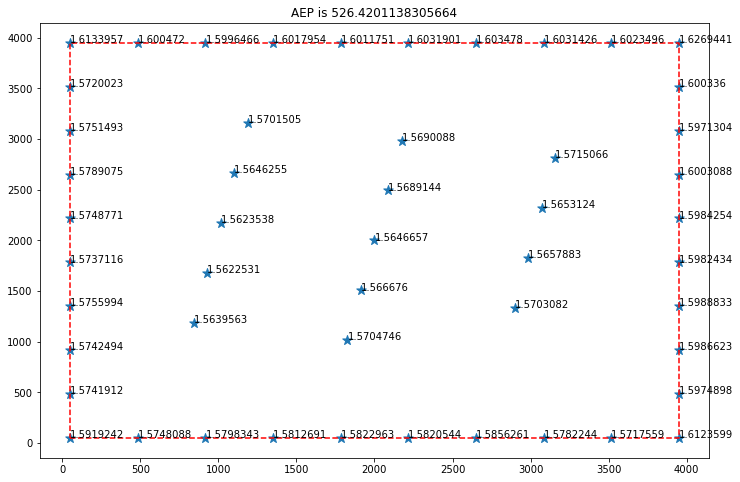

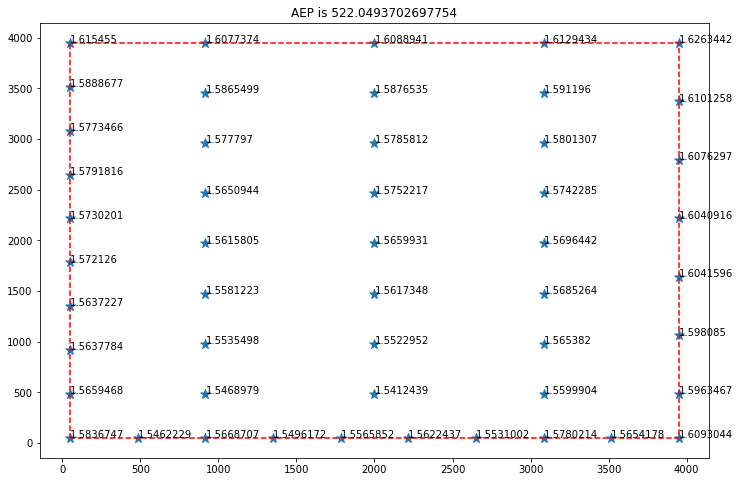

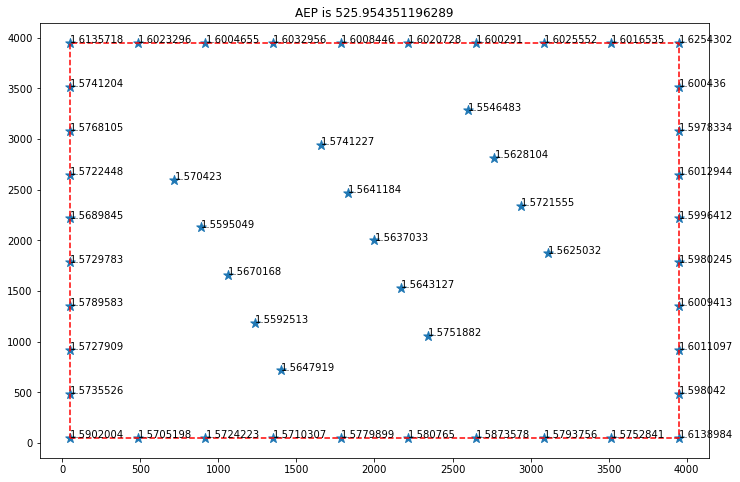

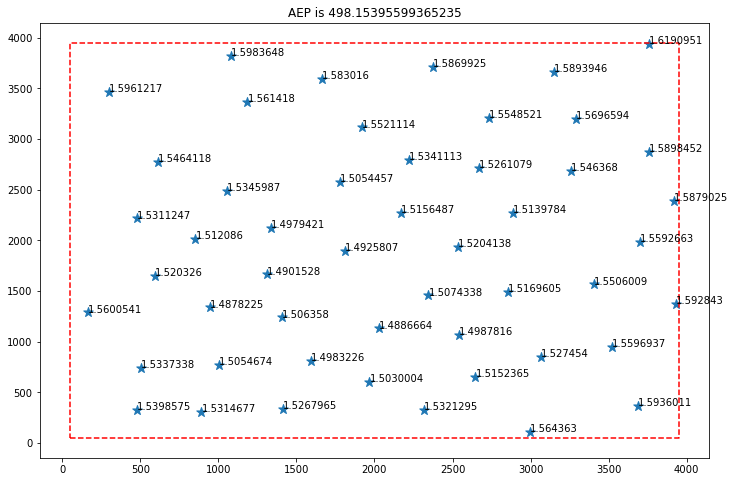

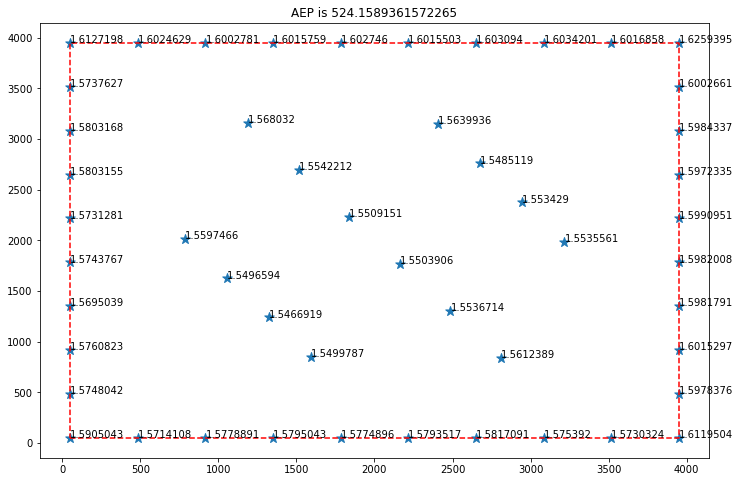

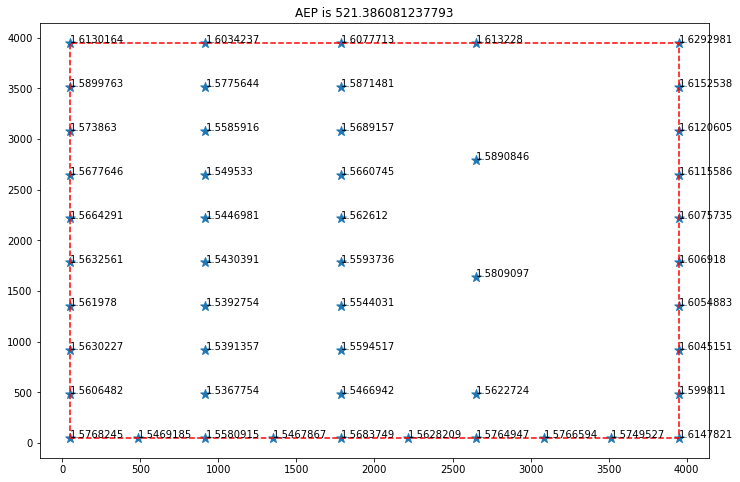

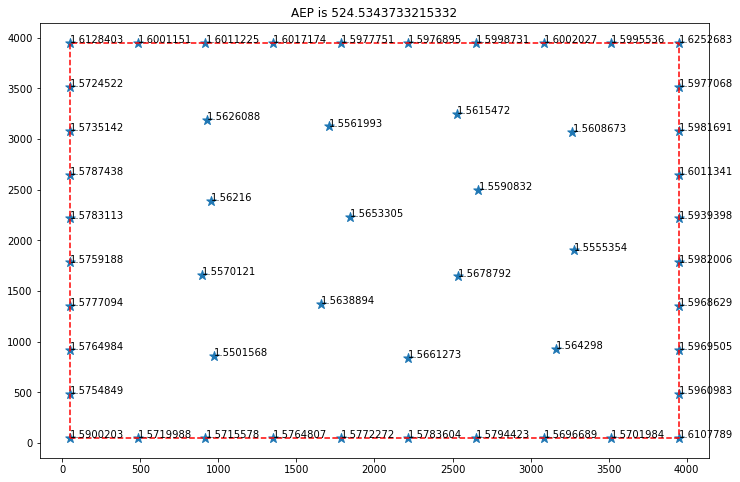

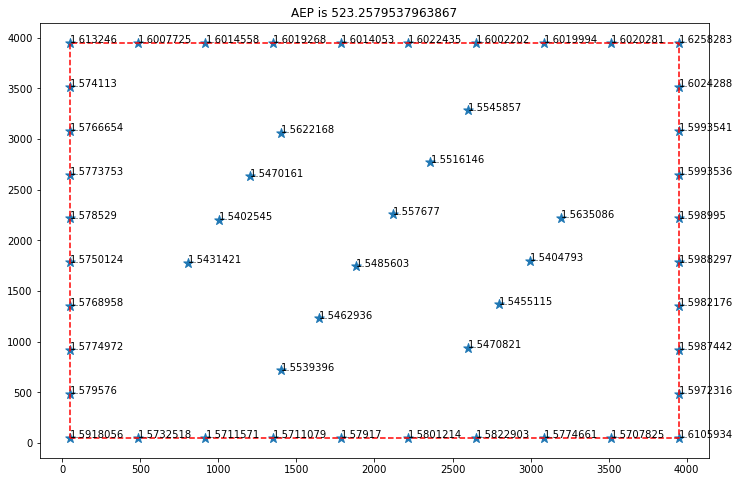

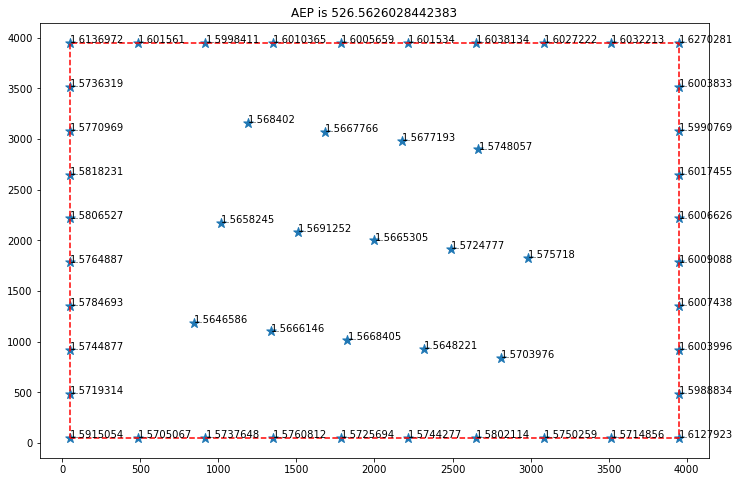

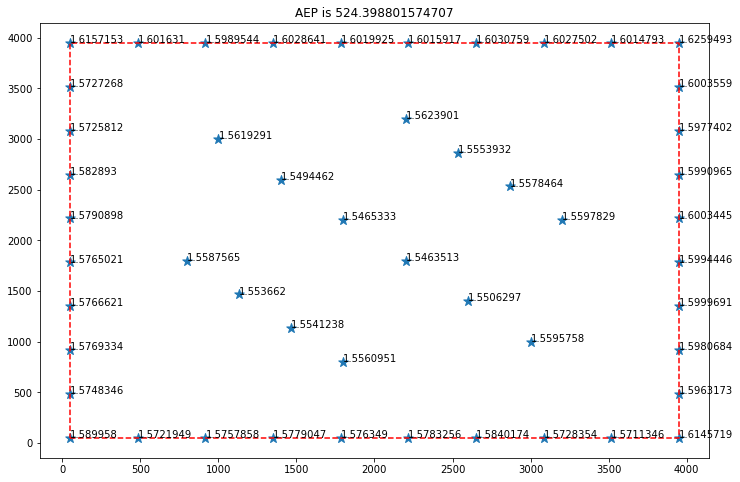

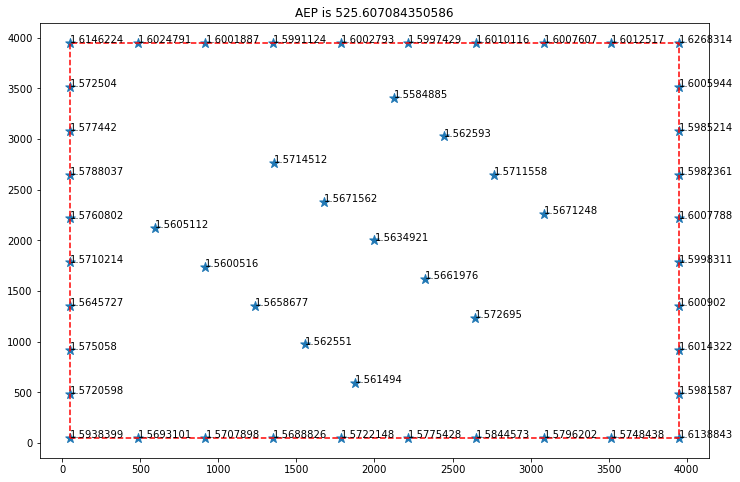

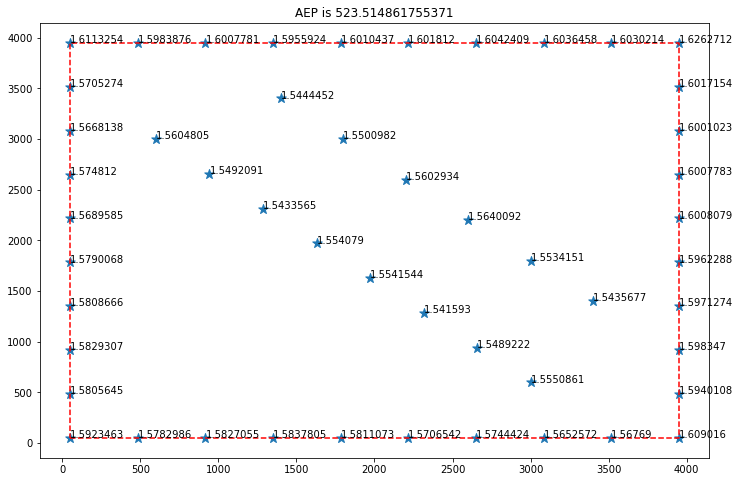

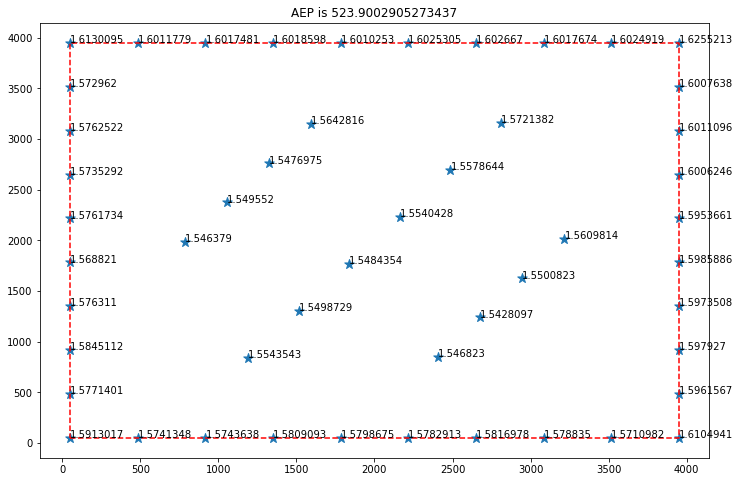

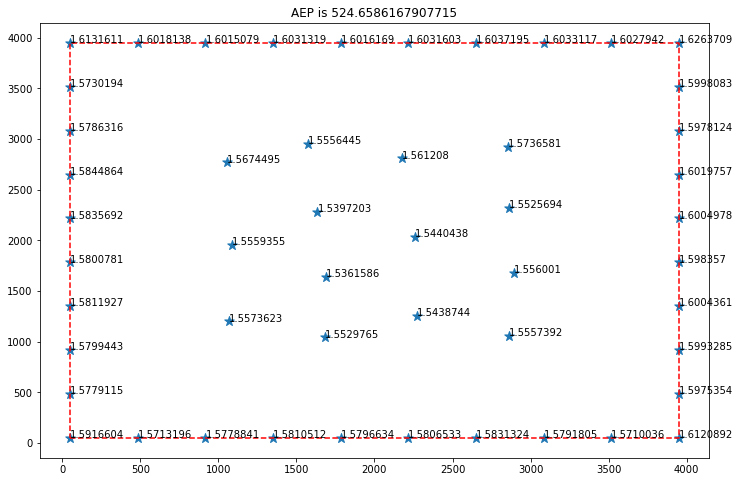

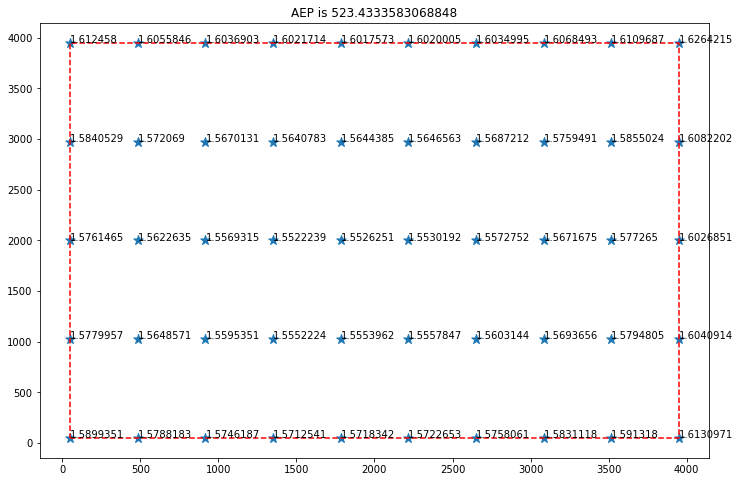

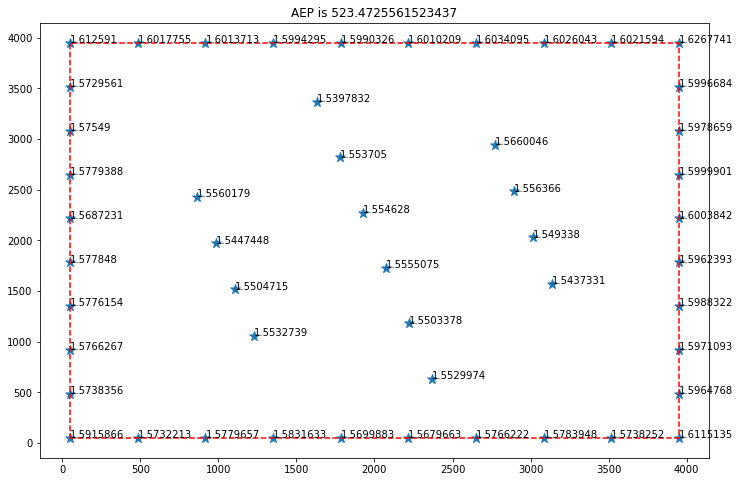

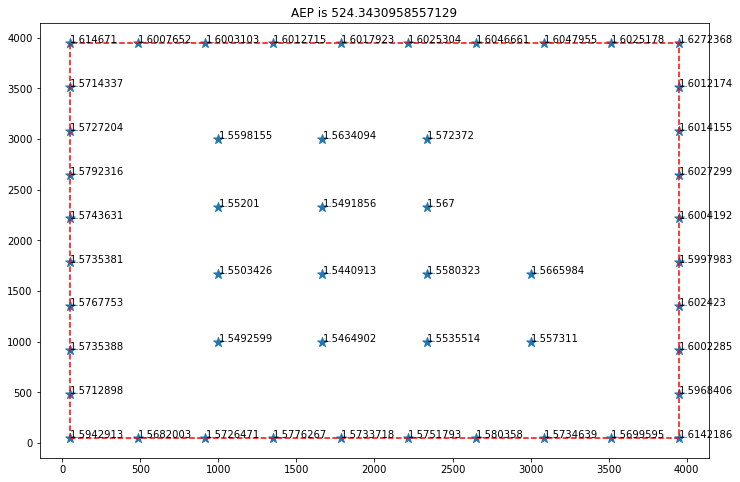

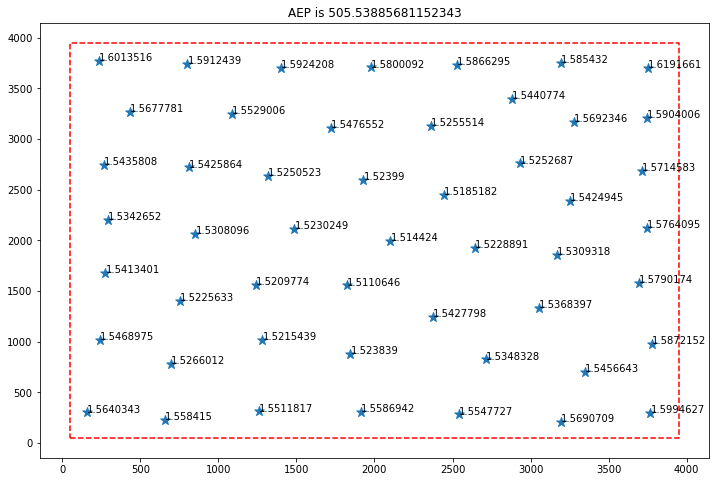

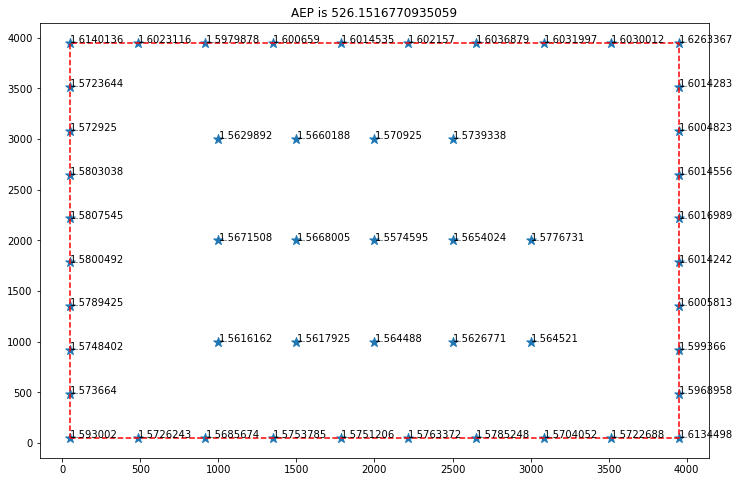

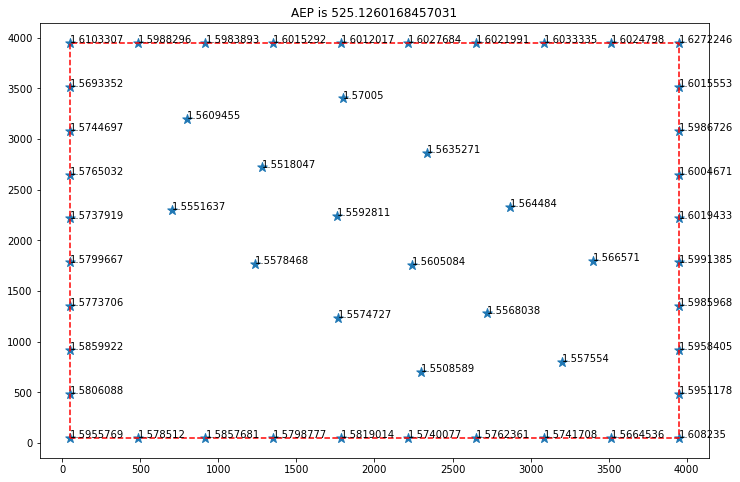

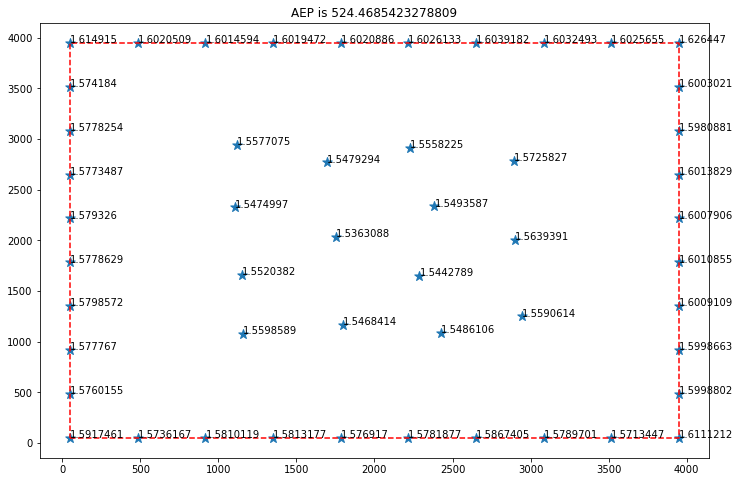

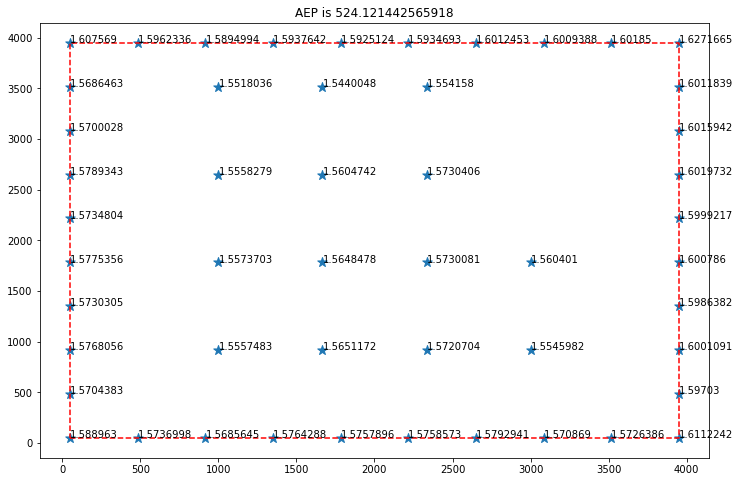

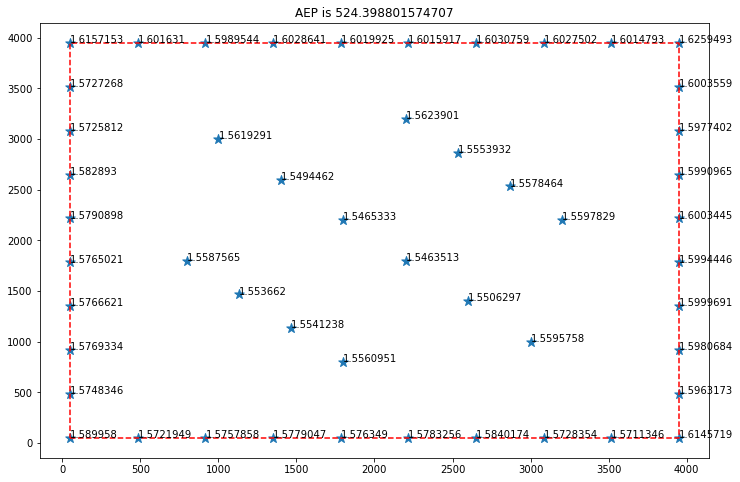

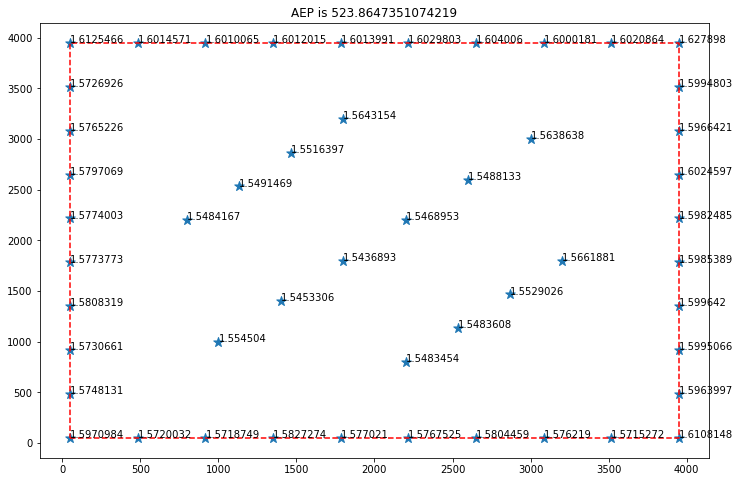

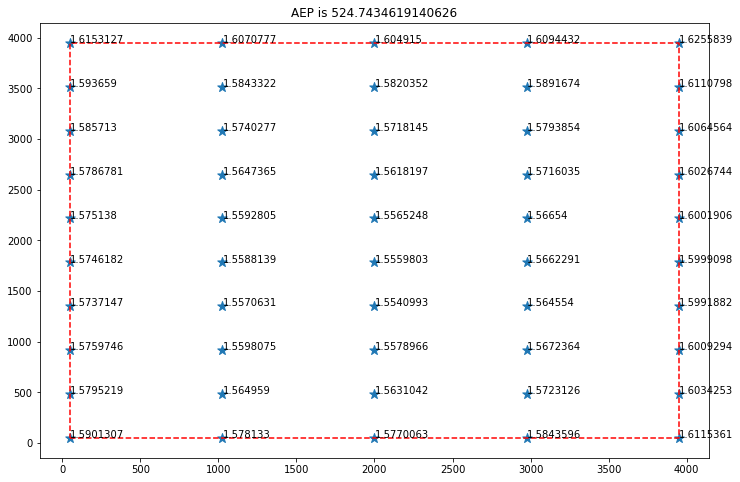

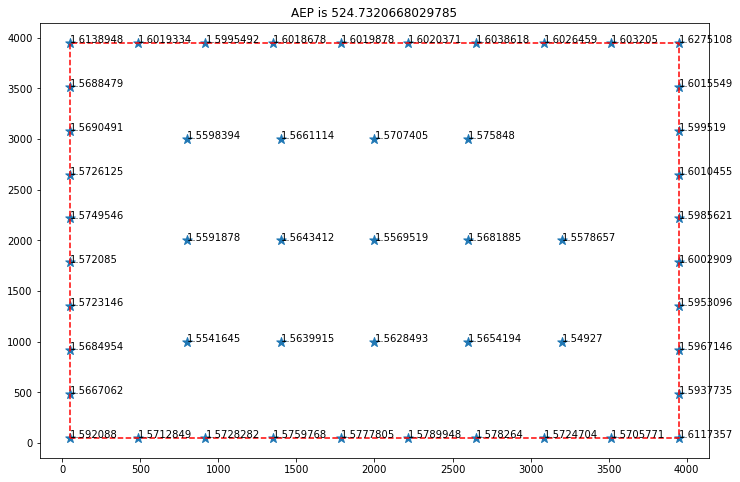

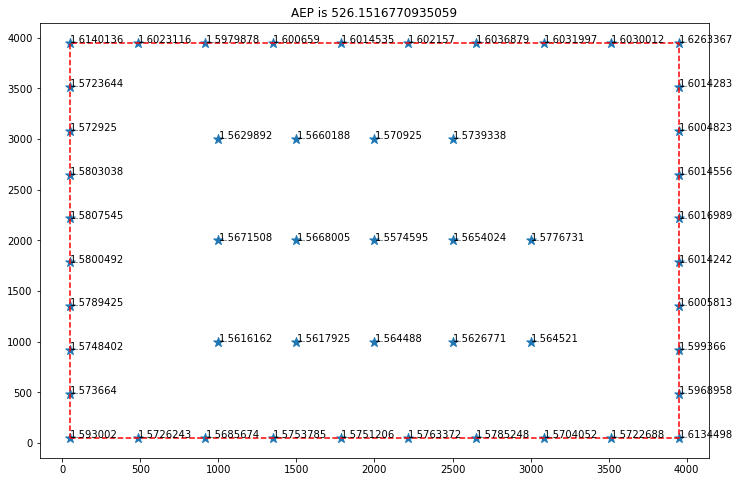

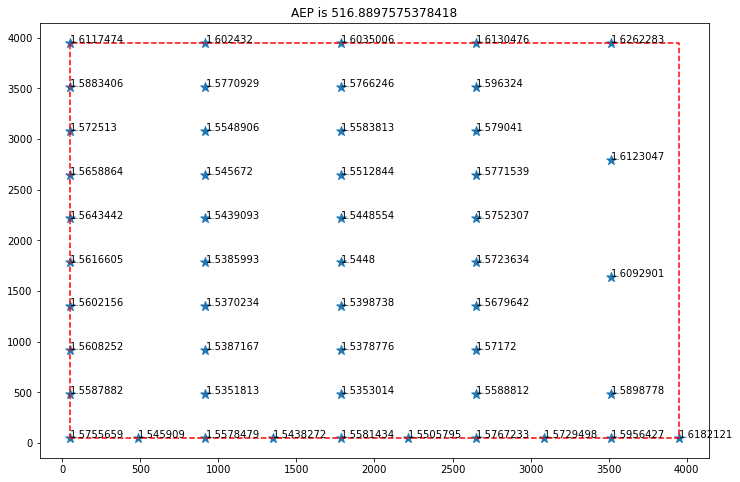

In [10]:
for file in turbine_datasets:
    AEP,farm_pwr,total_eff_speed = get_eff_speed(file,POWER_CURVE,WIND_DATA)
    plot_turbines4(file,total_eff_speed,title = AEP)

# FOR HIGHER AEP ONLY

# Effective Power

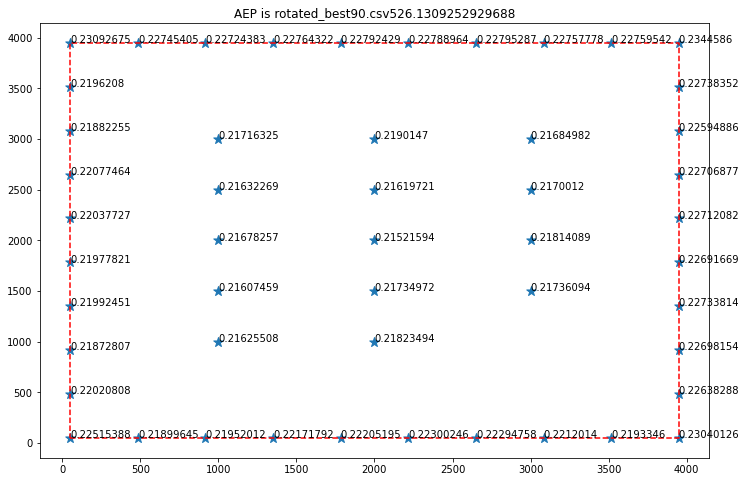

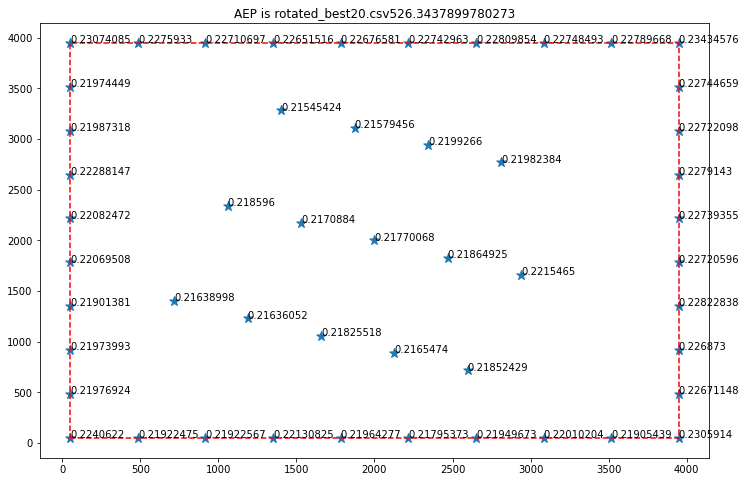

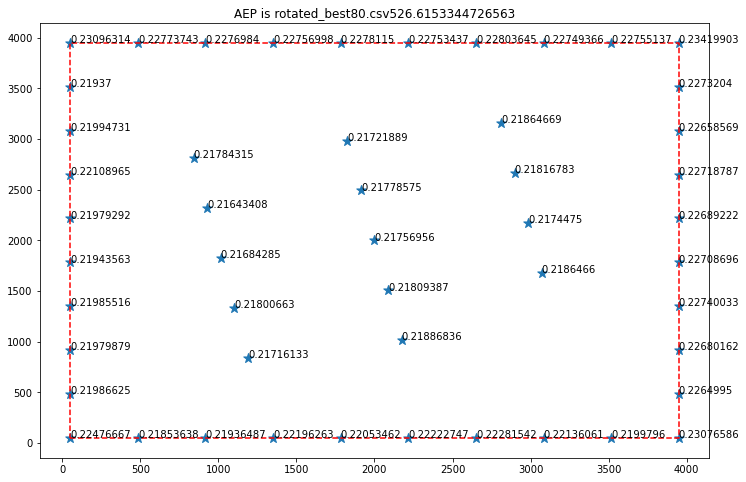

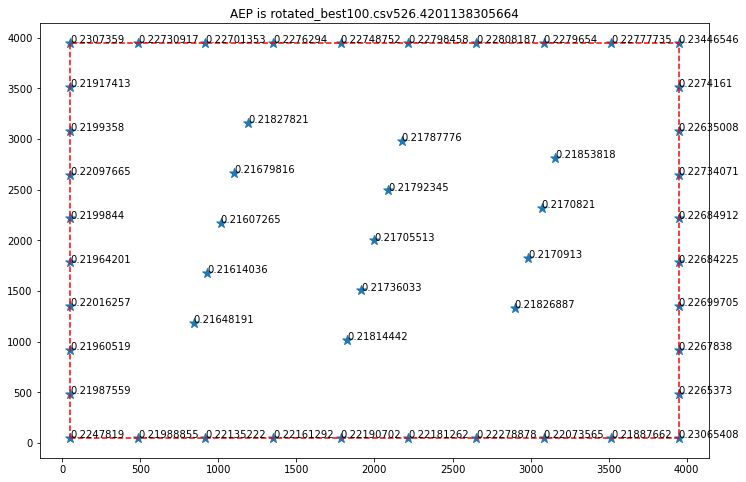

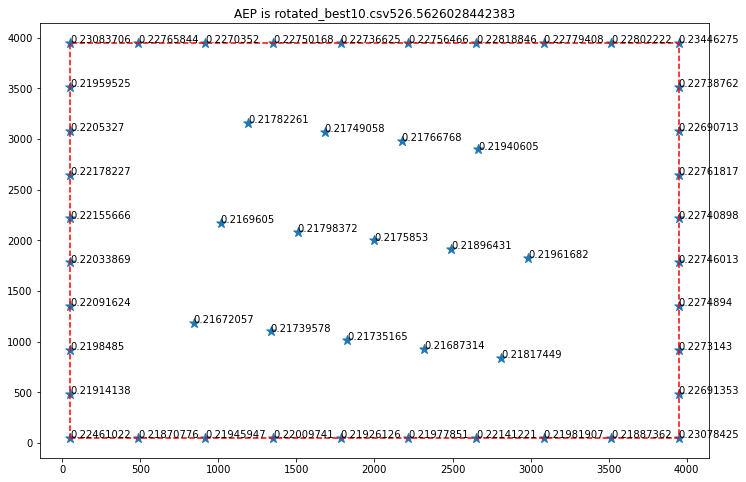

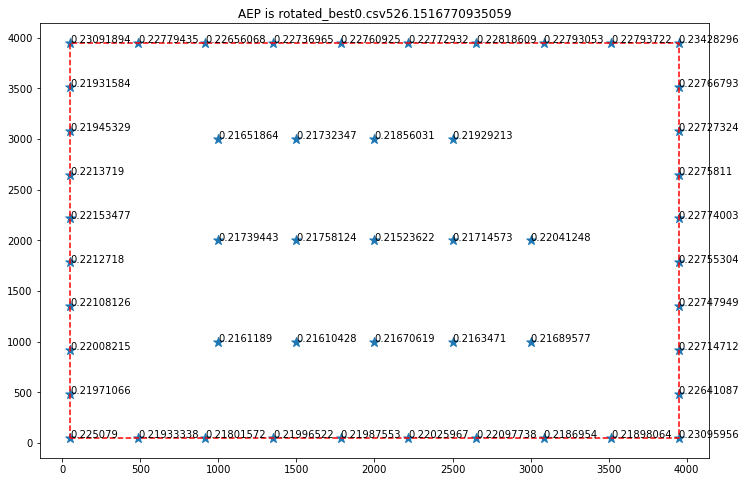

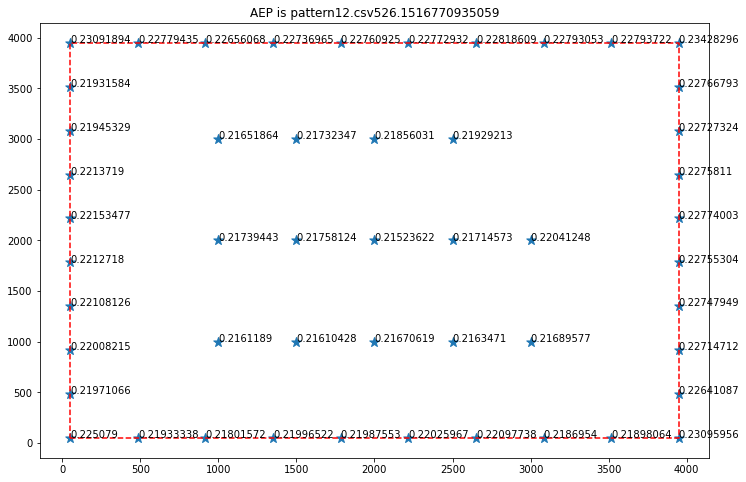

In [11]:
best_points = []
for file in turbine_datasets:
    AEP,farm_pwr,total_eff_pwr = get_eff_power(file,POWER_CURVE,WIND_DATA)
    if AEP > 526:
        best_points.append(file)
        plot_turbines4(file,total_eff_pwr,title = file.split('/')[-1] + str(AEP) )

# Effective speed

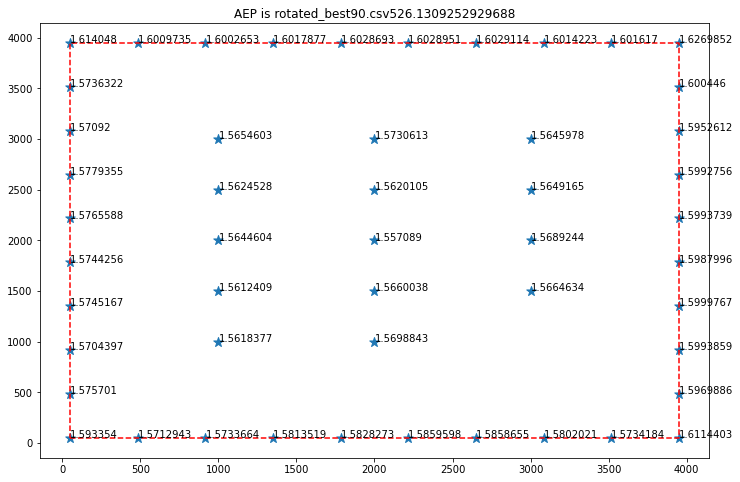

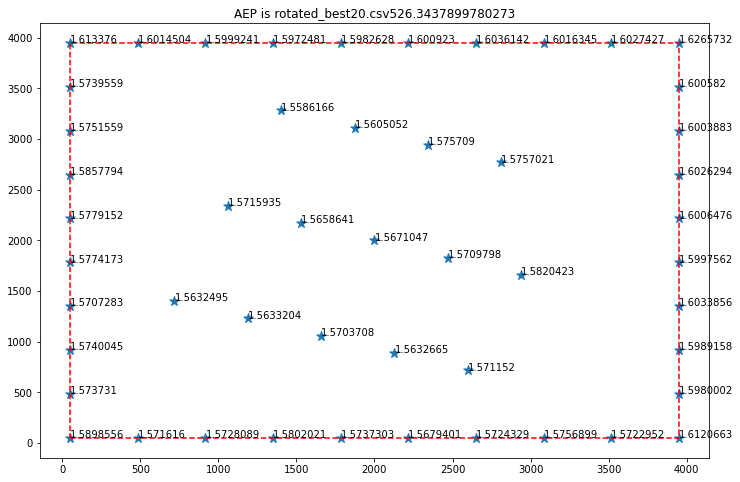

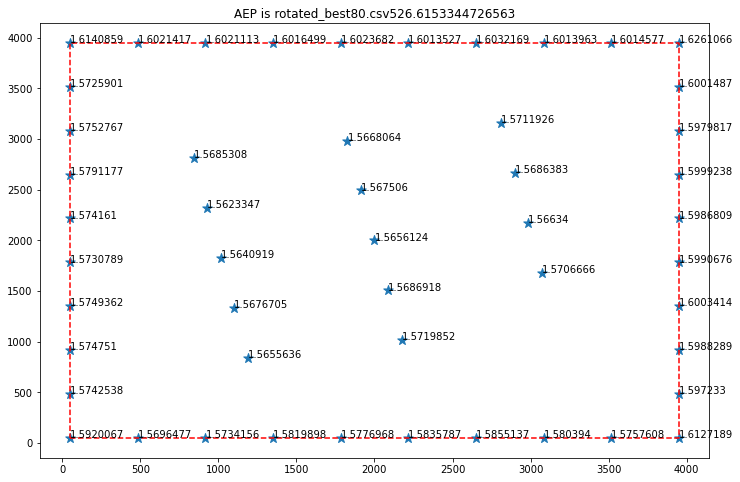

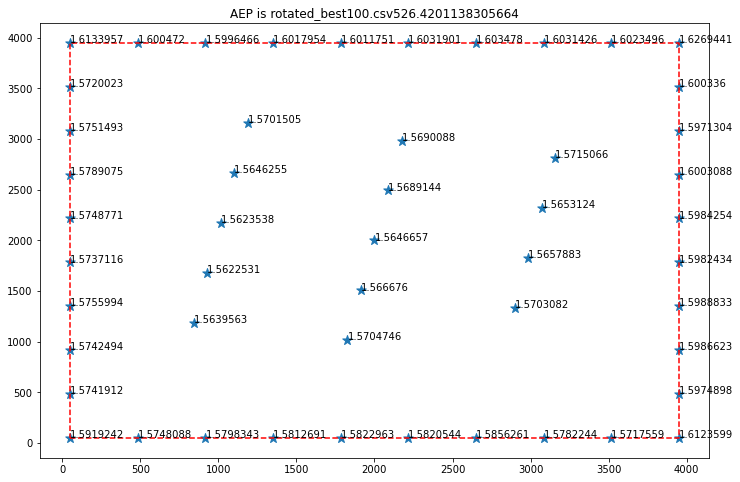

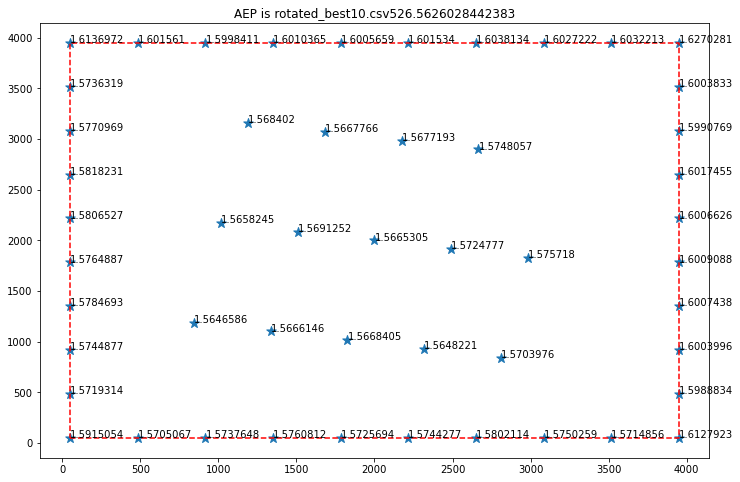

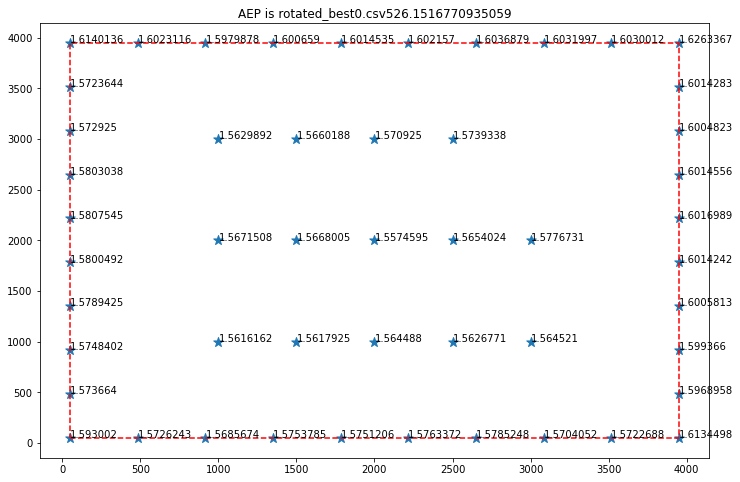

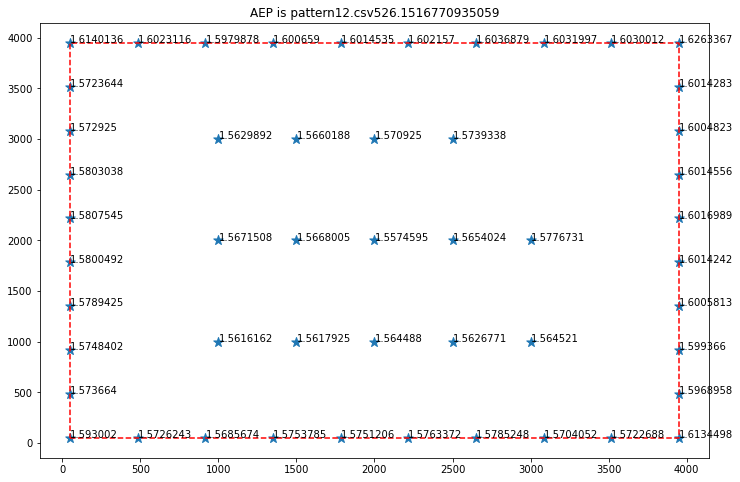

In [15]:
for file in turbine_datasets:
    AEP,farm_pwr,total_eff_speed = get_eff_speed(file,POWER_CURVE,WIND_DATA)
    if AEP > 526:
        plot_turbines4(file,total_eff_speed,title = file.split('/')[-1] + str(AEP))

In [12]:
best_points

['turbine_data/rotated_best90.csv',
 'turbine_data/rotated_best20.csv',
 'turbine_data/rotated_best80.csv',
 'turbine_data/rotated_best100.csv',
 'turbine_data/rotated_best10.csv',
 'turbine_data/rotated_best0.csv',
 'turbine_data/pattern12.csv']